## Diseño aerodinámico

Existen cuatro variables que representan valores de parámetros para el diseño del ala de una aeronave. Cada uno de estos parámetros puede tomar un valor entre 0 y 63.

El modelo aerodinámico dice que la elevación del ala está dada por la formula:

Elevación = (A - B)² + (C - D)² - (A-30)³ - (C-40)³

Encontrar los valores de parámetros que maximicen la elevación del ala.

## Codificación

- Definir como se codificará el problema
Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representarán los valores de los parámetros del ala del aeronave

[X1 X2 X3 X4]

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
 

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?

La función de adaptación será el resultado de la fórmula de elevación. Ya que se trata de maximizar el resultado. A mayor reultado mayor adaptación.


In [2]:
def adaptation_function(population):
    fitness = []
    for pop in population:
        fitness.append(
            ((pop[0] - pop[1]) ** 2) +
            ((pop[2] - pop[3]) ** 2) -
            ((pop[0] - 30) ** 3) -
            ((pop[2] - 40) ** 3)
        )
    return fitness

## Selección

In [3]:
# Recibe la lista con los entrenamientos de cada hijo y los ordena con numeros enteros ej: [1,2,3,4,5,6] basandose en el valor
# que se obtuvo en la adaptacion.
def rank(fitness,population):
    adaptation_function(population)
    array = np.array(fitness)
    temp = array.argsort()
    return (np.arange(len(array))[temp.argsort()]).tolist()
 
 
# Calculamos la probabilidad que tiene cada hijo, basandonos en la "SELECCION BASADA EN RANKING".
def probability(population, fitness):
    probability_list = []
    ranking = rank(fitness, population)
    for i in range(len(population)):
        probability_list.append(
            ((ranking[i]) / sum(ranking))
        )
    return probability_list
 
 
# Seleccionamos el/los padres de la lista de la poblacion, basandonos en la 
# probabilidad de cada individuo.
def select_parents(parents_num, population_len, probability_list):
    # population, weights = probability_list, k = parents_num
    population_aux = range(population_len)
    print(probability_list)
    parent_indexs = np.random.choice(population_aux,size=parents_num, replace=False, p=probability_list)
    return [population[i] for i in parent_indexs]



## Cruza

In [4]:
def crossover(parents):
    parents = np.array(parents)
    childrens = np.empty((len(parents),parents.shape[1]))
    crossover_point = np.uint8(parents.shape[0]/2)
    print(crossover_point)
    for k in range(len(parents)):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar el primer hijo con la primer mitad de un padre y la segunda de otro
        childrens[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Generar el segundo hijo con las partes opuestas
        childrens[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        print (parents.shape)
        print(parent1_idx,parent2_idx,crossover_point)    
        print(childrens)
        
    #Devolver lista de hijos
        
    return childrens


## Mutación
#### aplicamos mutación por limite - menor.

In [5]:
def mutation(childrens):
    for i, children in enumerate(childrens):
        random_index = random.choice(range(4))
        childrens[i][random_index] = round(random.uniform(0,63), 2)
    return childrens

# Algoritmo

In [6]:
def create_population():
    population = []
    amount_population = 60

    for _ in range(amount_population):
        a = round(random.uniform(0, 63),2)
        b = round(random.uniform(0, 63),2)
        c = round(random.uniform(0, 63),2)
        d = round(random.uniform(0, 63),2)

        population.append([round(a, 2),round(b, 2),round(c, 2),round(d, 2)])
    return population
if __name__ == "__main__":
    
    population = create_population()
    population_len = len(population)
    
    best_adaptation = list()
    generation = list()
    
    for i in range(200):
        fitness = adaptation_function(population)
        probability_list = probability(population, fitness)
        #print(probability_list)
        selected_parents = select_parents(population_len // 2, population_len, probability_list)
        #print(selected_parents)
        childrens = crossover(selected_parents)
        #print(childrens)
        childrens = mutation(childrens)
        #print(childrens)
        selected_parents.extend(childrens.tolist())
        new_population = selected_parents
        #print(new_population)
        population_len = len(new_population)
        population = new_population
        best_adaptation.append(max(fitness))
        generation.append(i)
        
    
    

[0.030508474576271188, 0.0022598870056497176, 0.014124293785310734, 0.0288135593220339, 0.01751412429378531, 0.022598870056497175, 0.01638418079096045, 0.005084745762711864, 0.013559322033898305, 0.007344632768361582, 0.0011299435028248588, 0.02598870056497175, 0.02768361581920904, 0.0062146892655367235, 0.020338983050847456, 0.00903954802259887, 0.02824858757062147, 0.011864406779661017, 0.023728813559322035, 0.031638418079096044, 0.031073446327683617, 0.010169491525423728, 0.0096045197740113, 0.02937853107344633, 0.004519774011299435, 0.029943502824858758, 0.024293785310734464, 0.02655367231638418, 0.023163841807909605, 0.002824858757062147, 0.012429378531073447, 0.015254237288135594, 0.006779661016949152, 0.03333333333333333, 0.001694915254237288, 0.025423728813559324, 0.011299435028248588, 0.02711864406779661, 0.007909604519774011, 0.005649717514124294, 0.020903954802259886, 0.021468926553672316, 0.0, 0.01864406779661017, 0.015819209039548022, 0.03220338983050847, 0.018079096045197

 [14.45  6.61 55.75 25.58]]
(30, 4)
17 18 15
[[22.7  33.54 13.13 11.8 ]
 [25.38 58.98 41.58 45.04]
 [37.14 17.52  7.36 57.96]
 [41.37 11.81 10.89 38.57]
 [53.6  14.51 14.51 48.69]
 [14.41 22.72  7.54 49.51]
 [37.14 51.57  7.36 57.96]
 [27.9  50.33 16.26 62.9 ]
 [ 9.23 53.53 44.88 26.85]
 [11.77 10.95 16.31 16.61]
 [11.77 10.95 16.31 28.23]
 [37.54 57.01 11.   11.61]
 [ 4.55 42.14 52.15  0.49]
 [14.45  6.61 55.75 14.31]
 [25.42 33.48 44.42 50.03]
 [17.16 62.64 38.21 52.55]
 [30.29 53.04 15.77 62.71]
 [55.66 45.56  3.56 24.58]
 [17.16 62.64 38.21 52.55]
 [30.6  10.23  2.5  28.65]
 [41.37 11.81 10.89 41.17]
 [ 9.22  8.35 49.48 28.64]
 [ 7.7   5.55  4.64 45.8 ]
 [ 4.17 10.82 35.08  1.94]
 [14.41 22.72  7.54 49.51]
 [37.14 51.57  7.36 57.96]
 [55.66 45.56 12.48 24.58]
 [23.26 13.59 44.69  0.92]
 [16.34 41.35 18.43 59.99]
 [14.45  6.61 55.75 25.58]]
(30, 4)
18 19 15
[[22.7  33.54 13.13 11.8 ]
 [25.38 58.98 41.58 45.04]
 [37.14 17.52  7.36 57.96]
 [41.37 11.81 10.89 38.57]
 [53.6  14.51 14.51

 [22.7  33.54 13.13 11.8 ]]
(30, 4)
4 5 15
[[37.54 57.01 11.   11.61]
 [55.66 32.95  3.56 24.58]
 [55.66 33.67  3.56 24.58]
 [ 7.7  19.49  4.64 45.8 ]
 [ 9.22  1.13 49.48 28.64]
 [ 4.55 42.14 52.15  0.49]
 [55.66 45.56  3.56 24.58]
 [ 7.7  19.49  4.64 45.8 ]
 [53.6  14.51  2.86 48.69]
 [37.54 57.01 11.   11.61]
 [33.43 25.44 26.47 34.36]
 [ 3.99 58.98 41.58 45.04]
 [22.7  33.54 13.13 25.05]
 [37.14 36.46  7.36 57.96]
 [11.77 10.95 16.31 16.61]
 [11.77 10.95 16.31 28.23]
 [52.97 14.51  2.86 48.69]
 [14.41 12.78  7.54 49.51]
 [37.14 17.52  7.36 57.96]
 [55.66 33.67  3.56 24.58]
 [33.43 62.21 26.47 34.36]
 [ 7.7   5.55  4.64 45.8 ]
 [30.29 44.2  15.77 62.71]
 [ 4.17 10.82 35.08  1.94]
 [37.14 51.57  7.36 57.96]
 [14.45  6.61 55.75 14.31]
 [20.36 41.35 18.43 40.22]
 [ 4.55 42.14 47.62  0.49]
 [14.41 22.72  7.54 49.51]
 [22.7  33.54 13.13 11.8 ]]
(30, 4)
5 6 15
[[37.54 57.01 11.   11.61]
 [55.66 32.95  3.56 24.58]
 [55.66 33.67  3.56 24.58]
 [ 7.7  19.49  4.64 45.8 ]
 [ 9.22  1.13 49.48 28.

[0.024293785310734464, 0.02598870056497175, 0.0327683615819209, 0.030508474576271188, 0.012994350282485875, 0.01864406779661017, 0.01807909604519774, 0.022598870056497175, 0.01977401129943503, 0.021468926553672316, 0.02824858757062147, 0.0288135593220339, 0.0192090395480226, 0.00903954802259887, 0.014689265536723164, 0.029943502824858758, 0.011864406779661017, 0.010169491525423728, 0.00847457627118644, 0.02768361581920904, 0.007909604519774011, 0.006779661016949152, 0.020903954802259886, 0.03220338983050847, 0.005084745762711864, 0.014124293785310734, 0.015819209039548022, 0.011299435028248588, 0.012429378531073447, 0.0005649717514124294, 0.024858757062146894, 0.025423728813559324, 0.02655367231638418, 0.031073446327683617, 0.013559322033898305, 0.01751412429378531, 0.01638418079096045, 0.023163841807909605, 0.020338983050847456, 0.022033898305084745, 0.02711864406779661, 0.0062146892655367235, 0.01694915254237288, 0.0096045197740113, 0.002824858757062147, 0.02937853107344633, 0.003389

 [ 7.7  42.42  4.64 45.8 ]]
(30, 4)
2 3 15
[[52.97 13.17  5.26 39.53]
 [ 7.7  19.49  4.64 45.8 ]
 [35.2  51.57  7.36 41.18]
 [23.81 14.51  2.86 48.69]
 [ 1.54 56.26  4.64 30.3 ]
 [ 7.7  19.49  4.64 45.8 ]
 [ 3.67  1.3   2.86 30.2 ]
 [ 6.81 26.44  8.79 26.42]
 [11.77 38.99 16.31 16.61]
 [ 6.81 39.13  8.79 15.57]
 [37.14 51.57  7.36 57.96]
 [ 3.67  1.3   2.86 48.69]
 [11.77  2.08 48.37 16.61]
 [37.14 17.52  7.36 57.96]
 [ 4.17 10.82 33.85 62.35]
 [15.37 26.44  8.79 26.42]
 [35.2  51.57  7.99 57.96]
 [52.97 13.17  2.86 39.53]
 [11.77 40.64 48.37 16.61]
 [37.54  4.99 11.   32.29]
 [23.81 14.51  2.86 31.26]
 [ 9.93 40.4   3.56 24.58]
 [35.2  51.57  7.36 57.96]
 [ 6.81 39.13  8.79 27.38]
 [52.62 14.51  2.86 48.69]
 [32.96 51.57  7.36 57.96]
 [37.54 57.01 11.   33.56]
 [14.41  6.85  7.54 49.51]
 [12.33 51.57  7.36 57.96]
 [ 7.7  42.42  4.64 45.8 ]]
(30, 4)
3 4 15
[[52.97 13.17  5.26 39.53]
 [ 7.7  19.49  4.64 45.8 ]
 [35.2  51.57  7.36 41.18]
 [ 1.54 56.26 46.75 30.3 ]
 [ 1.54 56.26  4.64 30.

 [52.97 13.17  2.86 48.69]]
(30, 4)
9 10 15
[[ 6.81 26.44  8.79  8.85]
 [ 6.81 39.13  8.79 15.57]
 [ 7.7  19.49  4.64 45.8 ]
 [ 7.7  58.48  4.64 34.95]
 [ 6.81 62.01  8.79 27.38]
 [62.18 14.51  2.86 48.69]
 [10.38 26.44  8.79 20.95]
 [39.7  62.01  8.79 27.38]
 [30.34 57.52 11.   33.56]
 [ 6.81 26.44  8.79  6.23]
 [ 7.7  42.42  4.64 39.8 ]
 [ 6.81 26.44  8.79 15.57]
 [23.81 32.26  2.86 31.26]
 [38.76 17.52  7.36 57.96]
 [ 7.7  58.48  4.64 45.8 ]
 [35.2  31.32  7.36 41.18]
 [52.97 47.6   2.86 48.69]
 [ 8.06 26.44  8.79 20.95]
 [52.62 14.51  2.86 48.69]
 [32.96 51.57  7.36 57.96]
 [ 6.81 42.39  8.79 15.57]
 [52.97 26.16  2.86 48.69]
 [ 6.81 26.44  8.79 22.83]
 [27.79 38.99 16.31 16.61]
 [39.7  62.01  8.79 27.38]
 [ 1.54 56.26  4.64 30.3 ]
 [23.81 14.51  2.86 48.69]
 [27.44 17.52  7.36 57.96]
 [37.54 57.52 11.   33.56]
 [52.97 13.17  2.86 48.69]]
(30, 4)
10 11 15
[[ 6.81 26.44  8.79  8.85]
 [ 6.81 39.13  8.79 15.57]
 [ 7.7  19.49  4.64 45.8 ]
 [ 7.7  58.48  4.64 34.95]
 [ 6.81 62.01  8.79 

 [ 3.1  62.01  8.79 27.38]]
(30, 4)
29 0 15
[[ 7.7  58.48  4.64 34.95]
 [23.81 32.26  2.86 31.26]
 [ 1.54 56.26  4.64 30.12]
 [ 6.81 26.44  8.79  8.85]
 [ 6.81 26.44  8.79 15.57]
 [ 6.81 36.92  8.79 22.83]
 [52.62 44.69  2.86 48.69]
 [12.33 54.8   7.36 57.96]
 [ 7.7  42.42  4.64 39.8 ]
 [ 6.81 47.5   8.79 15.57]
 [ 6.81 26.44  8.79  6.23]
 [47.16 42.42  4.64 39.8 ]
 [ 1.54 56.26  4.64 30.3 ]
 [47.08 54.8   7.36 57.96]
 [21.27 26.44  8.79 15.57]
 [43.45 42.42  4.64 39.8 ]
 [31.94 56.26  4.64 30.12]
 [50.53 62.01  8.79 27.38]
 [ 9.93 40.4   3.56 62.41]
 [ 7.7  58.48 15.46 34.95]
 [ 7.7  19.49  4.64 34.02]
 [52.62  5.28  2.86 48.69]
 [ 6.81 39.13  8.79 15.57]
 [62.18 14.51  2.86 42.56]
 [ 3.1  62.01  8.79 27.38]
 [52.97 47.6   2.86 48.69]
 [37.54 57.52 11.   56.83]
 [ 6.81 26.44 36.74  8.85]
 [ 6.81  9.4   8.79 15.57]
 [ 8.06 26.44  8.79 15.57]]
[0.031073446327683617, 0.02711864406779661, 0.0327683615819209, 0.020338983050847456, 0.021468926553672316, 0.022598870056497175, 0.0158192090395

 [ 8.06 26.44  8.79 15.57]]
(30, 4)
19 20 15
[[47.16 31.18  4.64 39.8 ]
 [ 1.54 56.26  4.64 12.7 ]
 [ 7.7  54.73  4.64 34.95]
 [ 3.46 47.5   8.79 15.57]
 [ 6.81  9.4  10.99 27.52]
 [ 7.7  16.48  4.64 34.02]
 [23.81 32.26  2.86 52.37]
 [47.16 42.42  4.64 39.8 ]
 [50.53 62.01 14.1  27.38]
 [12.33 54.8   7.36 57.96]
 [14.64 27.06  8.79 27.38]
 [ 1.54 58.53  4.64 30.3 ]
 [23.81 60.84  2.86 31.26]
 [ 1.54 56.26 57.57 12.7 ]
 [ 6.81  9.4   8.79 27.52]
 [ 6.81  9.4   8.79 36.05]
 [43.45 39.38  4.64 49.14]
 [ 1.54 56.26  4.64 30.3 ]
 [23.81 32.26  2.86 31.26]
 [ 4.31 54.8   7.36 57.96]
 [47.16 42.42  4.64 39.8 ]
 [ 6.81 39.13  8.79 15.57]
 [31.94 56.26  4.64 30.12]
 [45.   47.5   8.79 15.57]
 [47.08 54.8   7.36 57.96]
 [ 7.7  19.49  5.65 34.02]
 [50.53 62.01  8.79 27.38]
 [ 6.81 22.06  8.79 15.57]
 [52.62  5.28  2.86 37.89]
 [ 8.06 26.44  8.79 15.57]]
(30, 4)
20 21 15
[[47.16 31.18  4.64 39.8 ]
 [ 1.54 56.26  4.64 12.7 ]
 [ 7.7  54.73  4.64 34.95]
 [ 3.46 47.5   8.79 15.57]
 [ 6.81  9.4  10.99

 [ 1.54 56.26  4.64 30.3 ]]
(30, 4)
9 10 15
[[24.63 56.26  4.64 12.7 ]
 [ 9.93 14.62  3.56 37.15]
 [ 1.54 53.38  4.64 12.7 ]
 [ 9.93 40.4   3.56 37.15]
 [33.57 56.26  4.64 30.3 ]
 [ 4.31 54.8   7.36 50.59]
 [23.81 52.21  2.86 52.37]
 [ 6.   19.49  4.64 34.02]
 [52.62  5.28  2.86 37.89]
 [ 6.81  9.4   8.79 26.09]
 [ 4.31 54.8   7.36 57.96]
 [ 4.31 54.8   7.36 50.59]
 [ 7.7  54.73  4.64 34.95]
 [ 3.46 47.5   8.79 33.43]
 [ 9.93 40.4   3.56 37.15]
 [ 6.81 54.56  8.79 15.57]
 [ 1.54 56.26  1.45 30.3 ]
 [ 7.7  19.49  5.65 34.02]
 [12.33 54.8   7.36 57.96]
 [14.64 27.06  8.79 27.38]
 [31.94 56.26 29.32 20.55]
 [14.64 27.06  1.12 27.38]
 [ 6.81 39.13 33.63 15.57]
 [ 7.7  19.49  5.65  6.88]
 [23.81 60.84  2.86 31.26]
 [ 6.81  9.4  10.99 27.52]
 [ 6.81 22.06  8.79 15.57]
 [28.4  31.18  4.64 39.8 ]
 [ 7.7  22.37  4.64 34.02]
 [ 1.54 56.26  4.64 30.3 ]]
(30, 4)
10 11 15
[[24.63 56.26  4.64 12.7 ]
 [ 9.93 14.62  3.56 37.15]
 [ 1.54 53.38  4.64 12.7 ]
 [ 9.93 40.4   3.56 37.15]
 [33.57 56.26  4.64 

 [ 1.54 19.59  4.64 12.7 ]]
(30, 4)
2 3 15
[[ 7.7  54.73  3.62 34.95]
 [ 1.54 56.26  4.64 46.39]
 [ 1.54 56.26  4.64 30.3 ]
 [ 6.   19.49  4.64 34.02]
 [ 9.93 40.4   3.56 37.15]
 [ 7.7  54.73  3.62 34.95]
 [ 3.88  9.4   8.79 26.09]
 [ 7.7  19.49  5.65 34.02]
 [45.19  5.28  2.86 37.89]
 [33.85  9.4  10.99 27.52]
 [23.81 32.26  2.86 52.37]
 [ 1.54 56.26  4.64 30.3 ]
 [39.87 39.38  5.65  6.88]
 [ 1.54 56.26  4.64 12.7 ]
 [16.2   5.28  2.86 59.82]
 [ 4.31 55.28  7.36 57.96]
 [ 9.93 54.2   3.56 37.15]
 [34.22 22.37  4.64 34.02]
 [34.22 49.49  4.64 34.02]
 [28.4  28.76  4.64 39.8 ]
 [11.37 53.38  4.64 12.7 ]
 [11.1  56.26  4.64 12.7 ]
 [16.2   5.28  2.86 34.6 ]
 [10.06 52.21  2.86 52.37]
 [20.86  5.28  2.86 37.89]
 [ 6.81  9.4   8.79 26.09]
 [ 1.54 53.38  7.65 12.7 ]
 [23.81 52.21  2.86 52.37]
 [ 4.31 54.8   7.36 50.59]
 [ 1.54 19.59  4.64 12.7 ]]
(30, 4)
3 4 15
[[ 7.7  54.73  3.62 34.95]
 [ 1.54 56.26  4.64 46.39]
 [ 1.54 56.26  4.64 30.3 ]
 [ 9.93 40.4   3.56 37.15]
 [ 9.93 40.4   3.56 37.

 [ 4.31 42.55  7.36 57.96]]
(30, 4)
24 25 15
[[28.11  5.28  2.86 59.82]
 [ 4.31 55.28  7.36 57.96]
 [23.81 52.21  2.86 52.37]
 [20.86  5.28  2.86 37.89]
 [ 1.54 56.26  4.64 46.39]
 [12.35 52.21  2.86 52.37]
 [ 1.54 56.26  4.64 12.7 ]
 [ 1.54 53.38  7.65 12.7 ]
 [ 6.   19.49  4.64 34.02]
 [12.35 52.21  2.86 22.78]
 [16.2   5.28  2.86 34.6 ]
 [ 1.54 56.26  3.77 46.39]
 [ 4.31 42.55  7.36 57.96]
 [28.11 19.58  2.86 59.82]
 [ 4.31 38.32  7.36 57.96]
 [ 1.54  0.14  4.64 12.7 ]
 [16.2   5.28  2.86 59.82]
 [ 9.93 40.4   3.56 55.5 ]
 [52.62 43.23  2.86 37.89]
 [18.25  5.28  2.86 37.89]
 [ 1.54 19.59  4.64 12.7 ]
 [ 9.93 40.4   6.38 37.15]
 [ 1.54 19.59  4.64 20.88]
 [ 7.7  59.82  3.62 34.95]
 [16.2  23.53  2.86 34.6 ]
 [39.87 39.38  5.65  6.88]
 [34.22 49.49  4.64 34.02]
 [16.2   5.28  2.86 34.6 ]
 [ 6.   19.49  4.64 34.02]
 [ 4.31 42.55  7.36 57.96]]
(30, 4)
25 26 15
[[28.11  5.28  2.86 59.82]
 [ 4.31 55.28  7.36 57.96]
 [23.81 52.21  2.86 52.37]
 [20.86  5.28  2.86 37.89]
 [ 1.54 56.26  4.64

 [ 1.54 43.23  1.91 12.7 ]]
(30, 4)
12 13 15
[[10.06 52.21  2.86 41.01]
 [ 6.   19.49  4.64 34.02]
 [ 1.54 19.59 12.27 20.88]
 [32.78  5.28  2.86 35.91]
 [10.44  5.28  2.86 59.82]
 [ 1.54  0.14  4.64 12.7 ]
 [55.54 52.21  2.86 52.37]
 [ 1.54 19.59  4.64 12.7 ]
 [ 6.   19.49 17.81 15.79]
 [43.47  5.28  2.86 34.6 ]
 [ 7.7  30.18  3.62 34.95]
 [38.81  5.28  2.86 34.6 ]
 [12.35 52.21  2.86 42.66]
 [ 1.54 53.38  7.65 12.7 ]
 [ 7.7  59.82  3.62 34.95]
 [10.06 52.21  2.86 52.37]
 [16.2   5.28  2.86 34.6 ]
 [12.35 52.21  2.86 22.78]
 [ 3.97 56.26  4.64 46.39]
 [15.1  52.21  2.86 52.37]
 [ 1.54 56.26 38.69 12.7 ]
 [12.35 52.21  2.86 52.37]
 [ 1.54  0.14  4.64 12.7 ]
 [23.81 52.21  2.86 52.37]
 [ 1.54 56.26  4.64 12.7 ]
 [28.11  5.28  2.86 59.82]
 [ 4.31 42.55  7.36 57.96]
 [43.47  5.28  2.86 34.6 ]
 [ 9.93 40.4   6.38 37.15]
 [ 1.54 43.23  1.91 12.7 ]]
(30, 4)
13 14 15
[[10.06 52.21  2.86 41.01]
 [ 6.   19.49  4.64 34.02]
 [ 1.54 19.59 12.27 20.88]
 [32.78  5.28  2.86 35.91]
 [10.44  5.28  2.86

 [12.35 52.21  2.86 22.78]]
(30, 4)
29 0 15
[[10.06 52.21  2.86 52.37]
 [15.1  52.21  2.86 52.37]
 [10.06 52.21  2.86 41.01]
 [ 1.54 43.23  1.91 12.7 ]
 [ 1.54 22.24  1.91 12.7 ]
 [18.38 59.82  3.62 34.95]
 [ 1.54 27.59  3.77 46.39]
 [ 1.54 19.59  4.64 12.7 ]
 [43.47  5.28 40.95 34.6 ]
 [ 3.26  5.28  2.86 59.82]
 [12.35 52.21  2.86 52.37]
 [ 1.54 53.38  7.65 12.7 ]
 [49.52 22.24  1.91 12.7 ]
 [32.78  5.28  2.86 35.91]
 [12.35 31.72  2.86 52.37]
 [ 1.54 45.69  4.64 12.7 ]
 [28.11  5.28  2.86 59.82]
 [ 1.54 56.26  3.77 46.39]
 [ 1.54 19.59  4.64 20.88]
 [10.44  5.28  2.86 59.82]
 [10.06 27.47  2.86 58.41]
 [38.81  5.28  2.86 34.6 ]
 [10.06 52.21  2.86 58.41]
 [10.06 10.15  2.86 41.01]
 [22.96 52.21  2.86 52.37]
 [ 1.54 19.59  4.64 14.1 ]
 [10.06 52.21  2.86  6.45]
 [ 1.54  0.14  4.64 12.7 ]
 [12.35 52.21  7.9  42.66]
 [15.1  52.21  2.86 34.69]]
[0.022598870056497175, 0.013559322033898305, 0.021468926553672316, 0.03220338983050847, 0.031638418079096044, 0.007344632768361582, 0.02881355932

 [32.78 28.83  2.86 35.91]]
(30, 4)
9 10 15
[[ 1.54 47.16  4.64 12.7 ]
 [ 1.54 22.24  1.91 51.97]
 [ 1.54 43.23  1.91 12.7 ]
 [12.35 31.72  2.86 52.37]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 19.59  4.64 20.88]
 [12.35 52.21  2.86 52.37]
 [ 1.54 48.33  4.64 12.7 ]
 [ 1.54 20.22  3.77 46.39]
 [ 1.54 19.59  2.51  2.76]
 [ 1.54  0.14  4.64 12.7 ]
 [10.06 52.21  2.86 52.37]
 [12.35 52.21  2.86 52.37]
 [ 1.54 19.59  2.51 20.88]
 [10.06  2.17  2.86 58.41]
 [ 1.54  0.14  4.64 49.25]
 [ 1.54 45.69  4.64 12.7 ]
 [ 3.26  5.28  2.86 59.82]
 [18.38 59.82  3.62 54.52]
 [ 1.54 22.24  1.91 51.97]
 [ 1.54 20.22  3.77 46.39]
 [ 1.54 53.38  7.65 12.7 ]
 [ 1.54 19.59  4.64 14.1 ]
 [10.06 10.15  2.86 41.01]
 [28.93 52.21  2.86 58.41]
 [10.06 37.03  2.86 41.01]
 [ 1.54 53.38  7.65 45.58]
 [12.35 31.72  2.86 52.37]
 [ 1.54 19.59  4.64 12.7 ]
 [32.78 28.83  2.86 35.91]]
(30, 4)
10 11 15
[[ 1.54 47.16  4.64 12.7 ]
 [ 1.54 22.24  1.91 51.97]
 [ 1.54 43.23  1.91 12.7 ]
 [12.35 31.72  2.86 52.37]
 [ 1.54 46.35  1.91 

(30, 4)
6 7 15
[[10.06 61.48  2.86 58.41]
 [10.06 57.93  2.86 58.41]
 [ 1.54 14.76  4.64 14.1 ]
 [10.06  2.17  2.86 58.41]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 54.53  4.64 49.25]
 [ 1.54 19.59  1.93 12.7 ]
 [ 1.54 16.24  3.77 46.39]
 [ 1.54 54.53  4.64 49.25]
 [ 1.54 14.76  4.64 14.1 ]
 [ 1.54 54.37  4.64 12.7 ]
 [ 1.54 54.53  4.64 19.77]
 [10.06 37.03  2.86 41.01]
 [10.06 57.93  2.86 58.41]
 [ 1.54 20.22  3.77 17.89]
 [12.35 31.72  2.86 52.37]
 [ 1.54  5.35  1.91 12.7 ]
 [ 1.54 14.81  4.64 49.25]
 [10.88 31.72  2.86 52.37]
 [ 1.54 40.04  4.64 12.7 ]
 [ 1.54 47.16  4.64 12.7 ]
 [ 3.26 23.19  2.86 59.82]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 22.24  1.91 51.97]
 [10.06  2.17  2.86 58.41]
 [ 1.54 20.22 10.23 17.89]
 [ 1.54 53.38 47.18 45.58]
 [ 1.54  7.21  4.64 12.7 ]
 [ 1.54 19.59  4.64 20.88]
 [10.06 52.21  2.86 52.37]]
(30, 4)
7 8 15
[[10.06 61.48  2.86 58.41]
 [10.06 57.93  2.86 58.41]
 [ 1.54 14.76  4.64 14.1 ]
 [10.06  2.17  2.86 58.41]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 54.53  4.64 49.2

 [ 1.54 16.24  3.77 46.39]]
(30, 4)
14 15 15
[[ 1.54 55.2   4.64  2.31]
 [ 1.54 27.64  1.91 20.66]
 [ 1.54 24.58  4.64  0.07]
 [ 1.54 16.24  3.77 46.39]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 19.59  1.93 38.78]
 [ 1.54 54.53  4.64 49.25]
 [ 1.54 14.81  4.64 49.25]
 [10.06 39.86  2.86 58.41]
 [ 1.54 19.59  1.93 43.  ]
 [ 1.54 27.64  1.91 47.8 ]
 [ 1.54 54.53  4.64 19.77]
 [ 1.54 40.15  4.64 49.25]
 [ 1.54 54.53  4.64 23.07]
 [ 1.5  57.93  2.86 58.41]
 [ 1.54 54.53  4.64  4.75]
 [ 1.54 14.81  4.64 49.25]
 [ 1.54  0.14  4.64 49.25]
 [ 5.7   0.14  4.64 49.25]
 [10.06 37.03  2.86 29.74]
 [ 1.54 19.59  1.93 12.7 ]
 [ 1.54 54.53  4.64 41.46]
 [ 1.54 60.56  1.91 47.8 ]
 [ 1.5  57.93  2.86 58.41]
 [ 1.54  0.33  4.64 12.7 ]
 [ 1.54 40.04  4.64 12.7 ]
 [ 1.54 19.59  1.93 38.78]
 [10.06 61.48  6.73 58.41]
 [ 1.54 54.53  4.64 19.77]
 [ 1.54 16.24  3.77 46.39]]
(30, 4)
15 16 15
[[ 1.54 55.2   4.64  2.31]
 [ 1.54 27.64  1.91 20.66]
 [ 1.54 24.58  4.64  0.07]
 [ 1.54 16.24  3.77 46.39]
 [ 1.54 46.35  1.91

 [ 1.54 34.41  4.64 49.25]]
(30, 4)
17 18 15
[[ 1.54 61.65  4.64 49.25]
 [ 1.54 50.93  1.91 51.97]
 [ 1.54 16.24 19.72 18.1 ]
 [ 1.54 36.03  1.91 51.97]
 [ 1.17 13.62  4.64 49.25]
 [ 1.54 36.83  3.77 29.78]
 [ 1.54 60.56  1.91 47.8 ]
 [ 1.54 54.53  4.64 19.77]
 [ 1.54 14.47  1.93 38.78]
 [ 1.54 16.24  3.77 23.42]
 [ 1.54 14.47  1.93 61.01]
 [ 1.54 19.59  1.93  8.72]
 [ 1.54 52.5   1.91 47.8 ]
 [ 1.54 54.53  4.64 49.25]
 [ 1.54 13.04  4.64 49.25]
 [ 1.5  57.93  2.86 58.41]
 [ 1.54 16.24  3.77 14.16]
 [ 0.17 55.2   4.64  0.89]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 16.24  3.77 23.42]
 [ 1.54 50.93  1.91 51.97]
 [ 1.54 16.24  3.77 29.78]
 [ 1.54 27.64  1.91 20.66]
 [ 1.54 10.51  1.91 47.8 ]
 [ 1.5  57.93  2.86 58.41]
 [ 1.54 13.04  4.64 49.25]
 [10.06 23.83  2.86 58.41]
 [ 1.54 36.83  3.77 29.78]
 [ 1.54 45.73  4.64  0.07]
 [ 1.54 34.41  4.64 49.25]]
(30, 4)
18 19 15
[[ 1.54 61.65  4.64 49.25]
 [ 1.54 50.93  1.91 51.97]
 [ 1.54 16.24 19.72 18.1 ]
 [ 1.54 36.03  1.91 51.97]
 [ 1.17 13.62  4.64

 [ 1.54 54.53  4.64 19.77]]
(30, 4)
9 10 15
[[ 1.5  52.59  2.86 58.41]
 [ 1.54 61.65  4.64 37.46]
 [ 1.54 61.65  4.64 49.25]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 55.16  1.93 38.78]
 [ 1.54 16.24  3.77 29.78]
 [ 1.54 50.93  1.91 23.49]
 [ 1.54 59.49  4.64 49.25]
 [ 1.54 30.01  1.91 47.8 ]
 [ 1.54 14.47  1.93 61.01]
 [ 1.54 50.93  1.91 12.71]
 [ 1.54 19.59  1.93 43.  ]
 [ 1.54 36.83  3.77 29.78]
 [ 1.54 54.53  4.64 49.25]
 [ 1.54 19.59 39.23  8.72]
 [ 1.54 10.51  1.91 47.8 ]
 [ 1.17 13.62  4.64 49.25]
 [ 0.17 55.2   4.64  0.89]
 [ 1.54 14.47  1.93 24.03]
 [ 1.54 61.65  4.64 49.25]
 [ 1.5  52.59  2.86 58.41]
 [ 1.54 31.45  3.77 14.16]
 [10.62 16.24 19.72 18.1 ]
 [ 1.5  50.1   2.86 58.41]
 [ 1.54 16.24  3.77 23.42]
 [ 1.54 16.24  3.77 40.31]
 [ 6.86 45.73  4.64 59.91]
 [ 1.54 14.47  1.93 61.01]
 [ 1.54 61.65  4.64 37.46]
 [ 1.54 54.53  4.64 19.77]]
(30, 4)
10 11 15
[[ 1.5  52.59  2.86 58.41]
 [ 1.54 61.65  4.64 37.46]
 [ 1.54 61.65  4.64 49.25]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 55.16  1.93 

 [ 1.54 61.65  4.64 49.25]]
(30, 4)
7 8 15
[[ 1.54 16.24  3.77 17.69]
 [ 1.5  52.59  2.86 58.41]
 [ 1.54 40.97  4.64 49.25]
 [ 1.54 54.53  1.42 49.25]
 [ 1.54 52.5   1.91 26.78]
 [ 1.54 44.64  1.93 38.78]
 [ 1.54 10.51  1.91 47.8 ]
 [ 1.54 19.59  1.93 43.  ]
 [ 1.54 16.24  3.77 23.42]
 [ 1.5  56.01  2.86 58.41]
 [ 1.54 52.5   1.91 47.8 ]
 [ 4.66 10.51  1.91 47.8 ]
 [ 1.54 16.24  3.77 17.69]
 [ 1.54  1.23  1.93 61.01]
 [ 1.54 14.47  1.93 38.78]
 [ 1.54 14.47  1.93 61.01]
 [ 1.54 36.03  1.91 51.97]
 [ 1.54 44.64  1.93 38.78]
 [ 1.5  52.59  2.86 58.41]
 [ 1.54 50.93  1.91 23.49]
 [ 1.54 55.16  1.93 38.78]
 [ 1.54 52.5   1.91 26.78]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 59.49  4.64 49.25]
 [ 1.54 14.47  1.93 24.03]
 [ 1.54 19.59  1.93 43.  ]
 [ 1.5  59.17  2.86 58.41]
 [ 1.54 14.47  1.93 14.06]
 [ 1.54 10.51  1.91 47.8 ]
 [ 1.54 61.65  4.64 49.25]]
(30, 4)
8 9 15
[[ 1.54 16.24  3.77 17.69]
 [ 1.5  52.59  2.86 58.41]
 [ 1.54 40.97  4.64 49.25]
 [ 1.54 54.53  1.42 49.25]
 [ 1.54 52.5   1.91 26.

 [ 4.66 47.9   1.91 47.8 ]]
(30, 4)
29 0 15
[[ 1.54 55.16  1.93 38.78]
 [ 1.5  50.1   2.86 58.41]
 [ 1.54 54.53  1.42 60.48]
 [ 1.54 19.59  1.93 43.  ]
 [ 1.54 13.33  1.93 43.  ]
 [ 6.86 55.61  4.64 21.01]
 [ 1.54 61.14  1.91 51.97]
 [ 1.54 36.03  1.91 51.97]
 [33.59 54.53  1.42 49.25]
 [10.6  52.5   1.91 26.78]
 [ 1.54 11.24  1.42 60.48]
 [ 1.54 14.47  1.93 24.03]
 [ 1.5  52.59  2.86 58.41]
 [ 1.54 46.35  1.91 37.23]
 [ 1.54 52.5   1.91 26.78]
 [ 1.54 16.24  3.77 17.69]
 [ 1.54 34.29  1.91 57.27]
 [ 1.54 30.01  1.91 47.8 ]
 [ 1.54 46.35  1.91 47.8 ]
 [51.28 54.53  1.42 49.25]
 [ 1.54 54.53  1.42 49.25]
 [33.59  5.51  1.42 49.25]
 [26.32 11.81  1.91 47.8 ]
 [ 1.54 16.24  3.77 33.11]
 [ 1.54 34.11  1.93 38.78]
 [ 1.54 54.53  1.42 11.25]
 [ 1.54 35.13  1.91 51.97]
 [ 1.54 40.97  4.64 21.63]
 [ 1.54  1.23  1.93 61.01]
 [ 1.54 34.29  1.91 47.8 ]]
[0.02824858757062147, 0.01694915254237288, 0.03333333333333333, 0.0192090395480226, 0.01751412429378531, 0.0096045197740113, 0.031638418079096044

23 24 15
[[26.32  4.68  0.19 47.8 ]
 [ 1.54 11.24  1.42 60.48]
 [10.6  52.5   1.91 26.78]
 [ 1.54 30.01  1.91 47.8 ]
 [ 1.54 32.77  1.93 38.78]
 [ 4.15 54.53  1.42 60.48]
 [ 1.54 34.29  1.91 47.8 ]
 [ 1.54 34.11  1.93 38.78]
 [ 1.54 56.    1.42  8.08]
 [ 1.54 46.35  1.91 47.8 ]
 [ 1.54 61.14  1.91 51.97]
 [ 1.54 54.53  9.7  49.25]
 [17.26 13.33  3.52 43.  ]
 [ 1.54 46.35  1.91 37.23]
 [ 1.54 35.13  1.91 57.28]
 [ 1.5  40.31  2.86 58.41]
 [10.6   8.14  1.91 26.78]
 [ 1.54 54.53  1.42 60.48]
 [ 0.83 54.53  1.42 49.25]
 [ 1.54 54.53  1.42 11.25]
 [ 1.54  8.07  1.93 38.78]
 [ 1.54 13.33  1.93 43.  ]
 [ 1.54 34.11  1.93 37.92]
 [ 1.54 13.33  3.52 43.  ]
 [ 1.54 34.11  1.93 38.78]
 [ 1.54 54.53  1.42 60.48]
 [ 1.54 54.53  9.7  49.25]
 [ 1.5  50.1   2.86 58.41]
 [ 1.54 34.29  1.91 47.8 ]
 [ 1.54 30.01  1.91 47.8 ]]
(30, 4)
24 25 15
[[26.32  4.68  0.19 47.8 ]
 [ 1.54 11.24  1.42 60.48]
 [10.6  52.5   1.91 26.78]
 [ 1.54 30.01  1.91 47.8 ]
 [ 1.54 32.77  1.93 38.78]
 [ 4.15 54.53  1.42 60.48]
 

 [1.500e+00 4.031e+01 1.706e+01 5.841e+01]]
(30, 4)
14 15 15
[[1.500e+00 4.031e+01 2.860e+00 5.841e+01]
 [1.540e+00 1.124e+01 3.524e+01 6.048e+01]
 [1.540e+00 3.513e+01 2.300e-01 5.728e+01]
 [1.540e+00 3.429e+01 1.910e+00 1.366e+01]
 [2.059e+01 3.000e-02 1.900e-01 4.780e+01]
 [1.540e+00 5.600e+01 1.420e+00 8.080e+00]
 [1.540e+00 5.453e+01 1.420e+00 6.048e+01]
 [1.540e+00 2.190e+01 1.910e+00 1.366e+01]
 [1.540e+00 4.635e+01 1.910e+00 3.723e+01]
 [1.540e+00 3.513e+01 1.910e+00 5.728e+01]
 [1.540e+00 8.790e+00 1.910e+00 3.084e+01]
 [1.540e+00 5.830e+01 1.930e+00 3.792e+01]
 [1.540e+00 5.830e+01 1.930e+00 1.974e+01]
 [1.540e+00 3.858e+01 1.910e+00 5.197e+01]
 [1.540e+00 3.513e+01 1.910e+00 5.197e+01]
 [1.540e+00 2.176e+01 1.910e+00 5.728e+01]
 [1.540e+00 5.453e+01 1.420e+00 6.048e+01]
 [1.540e+00 5.830e+01 1.930e+00 3.792e+01]
 [1.540e+00 5.600e+01 1.420e+00 8.080e+00]
 [1.540e+00 6.114e+01 1.910e+00 5.197e+01]
 [4.150e+00 5.453e+01 1.420e+00 6.048e+01]
 [1.540e+00 1.124e+01 1.420e+00 6.04

 [1.540e+00 2.176e+01 1.910e+00 5.728e+01]]
(30, 4)
4 5 15
[[1.540e+00 1.124e+01 1.420e+00 6.048e+01]
 [1.540e+00 2.190e+01 1.910e+00 3.119e+01]
 [1.540e+00 4.294e+01 1.910e+00 3.723e+01]
 [1.540e+00 5.600e+01 1.420e+00 1.961e+01]
 [1.540e+00 3.416e+01 1.910e+00 3.723e+01]
 [1.540e+00 3.513e+01 1.910e+00 5.197e+01]
 [3.533e+01 5.453e+01 1.420e+00 1.125e+01]
 [1.500e+00 4.031e+01 2.860e+00 4.040e+01]
 [2.059e+01 3.000e-02 1.900e-01 4.780e+01]
 [1.540e+00 1.966e+01 1.910e+00 4.313e+01]
 [1.540e+00 9.190e+00 3.524e+01 6.048e+01]
 [1.540e+00 5.453e+01 1.420e+00 1.125e+01]
 [1.540e+00 5.600e+01 1.420e+00 8.080e+00]
 [1.540e+00 1.682e+01 1.910e+00 5.197e+01]
 [3.533e+01 5.325e+01 1.420e+00 1.125e+01]
 [4.682e+01 6.114e+01 1.910e+00 5.197e+01]
 [1.540e+00 5.453e+01 1.420e+00 6.048e+01]
 [1.540e+00 3.416e+01 1.910e+00 3.723e+01]
 [1.540e+00 1.124e+01 1.420e+00 6.048e+01]
 [1.540e+00 4.635e+01 1.910e+00 5.976e+01]
 [1.540e+00 4.577e+01 1.910e+00 5.728e+01]
 [1.540e+00 2.190e+01 1.910e+00 1.366e

 [1.540e+00 8.630e+00 1.420e+00 3.339e+01]]
(30, 4)
22 23 15
[[1.540e+00 4.294e+01 1.910e+00 3.723e+01]
 [1.540e+00 4.835e+01 1.420e+00 6.048e+01]
 [1.540e+00 1.350e+01 1.420e+00 6.048e+01]
 [1.540e+00 4.577e+01 1.910e+00 5.728e+01]
 [1.540e+00 5.453e+01 1.420e+00 6.048e+01]
 [1.540e+00 7.580e+00 1.930e+00 5.460e+00]
 [1.540e+00 1.708e+01 1.930e+00 5.460e+00]
 [1.540e+00 3.449e+01 1.910e+00 3.723e+01]
 [1.540e+00 2.176e+01 1.910e+00 5.728e+01]
 [1.540e+00 2.176e+01 1.910e+00 4.591e+01]
 [1.540e+00 4.635e+01 1.910e+00 6.235e+01]
 [1.540e+00 5.180e+01 1.910e+00 5.728e+01]
 [1.540e+00 8.630e+00 1.420e+00 3.339e+01]
 [6.113e+01 3.000e-02 1.900e-01 4.780e+01]
 [1.540e+00 8.630e+00 1.420e+00 1.961e+01]
 [6.590e+00 4.780e+00 1.900e-01 4.780e+01]
 [4.682e+01 6.114e+01 1.910e+00 4.983e+01]
 [1.540e+00 1.124e+01 1.420e+00 6.048e+01]
 [1.540e+00 2.862e+01 1.910e+00 6.235e+01]
 [1.540e+00 1.682e+01 1.910e+00 5.197e+01]
 [1.540e+00 5.600e+01 1.420e+00 1.961e+01]
 [1.540e+00 1.682e+01 1.910e+00 2.63

 [ 1.54  7.13  1.91 24.91]]
(30, 4)
14 15 15
[[ 1.54 61.57  1.91 51.97]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54 38.58  1.91 51.97]
 [18.52 51.8   1.91 57.28]
 [ 1.54 28.3   1.91 62.35]
 [ 1.54 45.77  1.91 57.28]
 [ 1.54 21.76  1.91  4.93]
 [ 6.59  4.78  0.19 47.8 ]
 [ 1.54  9.2   1.91 22.88]
 [ 1.54 13.5  12.97 60.48]
 [ 1.54 28.62  1.91 47.24]
 [39.07 11.24  1.42 60.48]
 [ 1.54 16.82  1.91  1.35]
 [ 1.54 28.62  1.91 62.35]
 [ 6.23 30.81  1.91 49.83]
 [56.35 21.9   1.91 31.19]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54  7.13  1.91 62.35]
 [ 1.54 13.5  12.97 60.48]
 [ 1.54 21.76  1.91 57.28]
 [ 1.54 61.57  1.91 51.97]
 [ 1.54 46.35  1.91  5.14]
 [ 1.54 10.17  1.93  5.46]
 [ 1.54  8.63  1.42 19.61]
 [ 1.54 34.49  1.91 37.23]
 [39.07 11.24  1.42 60.48]
 [ 6.59  4.78  0.19 47.8 ]
 [18.52 51.8   1.91 57.28]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54  7.13  1.91 24.91]]
(30, 4)
15 16 15
[[ 1.54 61.57  1.91 51.97]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54 38.58  1.91 51.97]
 [18.52 51.8   1.91 57.28]
 [ 1.54 28.3   1.91

15
(30, 4)
0 1 15
[[ 1.54 28.62  1.91 47.24]
 [ 1.54 16.82  1.91 49.26]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54  9.2   1.91 22.88]
 [ 1.54 46.35  1.91  5.14]
 [39.07 11.24  1.42 60.48]
 [ 1.54 28.62  1.91 47.24]
 [ 1.54  7.13  1.91  7.99]
 [ 1.54 45.77  1.91 57.28]
 [ 1.54  7.13  1.91 62.35]
 [40.91  9.2   1.91 22.88]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54 42.94  1.91 51.52]
 [ 1.54 16.62  1.93  5.46]
 [ 1.54 28.62  1.91 62.35]
 [ 1.54 34.49  1.91 37.23]
 [ 1.54 40.37  1.91  5.14]
 [ 1.54 61.57  1.91 42.8 ]
 [ 1.54 50.45  1.93  5.46]
 [ 1.54 28.62  2.83 62.35]
 [ 1.54 17.08  1.93  5.46]
 [ 1.54 14.65  1.91 51.97]
 [ 1.54 45.77  8.99 57.28]
 [ 1.54 42.94  1.91 30.04]
 [ 1.54 42.94  1.91 17.6 ]
 [ 1.54 34.49  1.91 48.29]
 [ 1.54 16.82  1.91 51.97]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 33.44  1.91 57.28]
 [ 1.54 21.76  1.91  4.93]]
(30, 4)
1 2 15
[[ 1.54 28.62  1.91 47.24]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54  9.2   1.91 22.88]
 [ 1.54 46.35  1.91  5.14]
 [39.07 11.24  1.42 6

 [ 1.54  1.    1.91 51.52]]
(30, 4)
24 25 15
[[ 1.54 36.57  1.91 62.35]
 [ 1.54 38.28  1.91 51.97]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 45.77  1.91 57.28]
 [ 1.54 42.94  1.91 48.55]
 [ 1.54 14.65  1.91 51.97]
 [ 1.54 34.49  3.78  7.6 ]
 [36.1  38.58  1.91 51.97]
 [ 1.54 34.49  1.91 48.29]
 [ 1.54 30.69  1.91 57.28]
 [ 1.54 46.35  1.91 42.15]
 [ 1.54 16.82  1.91 20.4 ]
 [ 1.54 42.94  1.91 30.04]
 [ 1.54 19.09  1.91 30.04]
 [ 1.54 34.49  1.91 51.71]
 [ 1.54 34.49  1.91 37.23]
 [ 1.54 46.35  1.91  8.06]
 [29.57 34.49  1.91 48.29]
 [ 1.54 14.02  1.91 46.31]
 [ 1.54 29.59  1.91 37.23]
 [ 1.54 16.82  1.91 57.66]
 [ 1.54 50.45  1.93 42.3 ]
 [ 1.54 61.57  1.91 42.8 ]
 [ 1.54 16.82  1.91 51.97]
 [ 1.54 54.95  1.91 17.6 ]
 [ 1.54  7.13  1.91 62.35]
 [ 1.54 36.57  1.91 62.35]
 [ 1.54 19.09  1.91 30.04]
 [ 1.54  1.    1.91 51.52]]
(30, 4)
25 26 15
[[ 1.54 36.57  1.91 62.35]
 [ 1.54 38.28  1.91 51.97]
 [ 1.54 34.49  1.91  7.6 ]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 45.77  1.91

 [ 1.54 29.59  1.91 57.34]]
(30, 4)
18 19 15
[[ 1.54 34.49  1.91 48.29]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54 42.94  1.91 61.05]
 [ 1.54 46.92  1.91 30.04]
 [ 7.94 34.49  1.91 37.23]
 [ 1.54 42.94  1.91 48.55]
 [ 1.54 34.49  3.78 41.53]
 [ 1.54 42.94 42.59 48.55]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 34.49  1.91 51.71]
 [ 1.54 17.46  1.91 57.66]
 [ 1.54 36.57  1.91 62.35]
 [ 1.54 19.09  1.91 30.04]
 [ 1.54 34.49  1.91 53.43]
 [36.1  33.32  1.91 51.97]
 [ 1.54 32.47  1.91 38.97]
 [ 1.54 42.94  1.91 30.04]
 [ 1.54 46.92  1.91 16.67]
 [ 1.54 22.17  1.91 57.28]
 [ 1.54 34.49  1.91 29.36]
 [ 1.54 14.02  1.91 46.31]
 [ 1.54 54.95  1.91 17.6 ]
 [ 1.54 19.09  1.91 30.04]
 [ 1.54 46.92  1.91 30.04]
 [ 1.54 42.94  1.91 30.04]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 50.45  1.93  5.46]
 [ 1.54 46.35  1.91 42.15]
 [ 1.54 51.8   4.93 57.28]
 [ 1.54 29.59  1.91 57.34]]
(30, 4)
19 20 15
[[ 1.54 34.49  1.91 48.29]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54 42.94  1.91 61.05]
 [ 1.54 46.92  1.91 30.04]
 [ 7.94 34.49  1.91

(30, 4)
27 28 15
[[ 1.61 29.59  1.91 57.34]
 [ 1.54 34.49  1.91 50.78]
 [ 1.54 46.92  5.46 16.67]
 [ 1.54 42.94  1.91 60.87]
 [ 1.54 51.8   1.91 50.82]
 [ 1.54 34.49  1.91 53.43]
 [ 1.54 17.46  1.91 57.66]
 [ 1.54 42.94  1.91 36.82]
 [ 1.61 29.59  1.91 47.78]
 [ 1.54 16.82 14.4  42.09]
 [ 1.54 62.02  1.91 57.28]
 [ 1.54 29.59  1.91 57.34]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 62.78  1.93  5.46]
 [ 1.54 42.94  1.91 30.83]
 [ 1.54 32.47  1.91 46.91]
 [ 1.54 42.94  1.91 61.05]
 [ 1.54 32.6   1.91 57.28]
 [ 1.54 42.94  1.91 21.06]
 [19.4  34.49  1.91 50.78]
 [ 1.54 10.55  1.91 60.87]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54 18.03  1.91 62.35]
 [ 1.54 34.49  1.91 37.23]
 [ 1.54 32.47  1.91 51.97]
 [ 1.54  3.64  1.91 46.91]
 [36.1  38.58  1.91 51.97]
 [ 1.54 13.83  1.91 38.97]
 [ 1.54 34.49  1.91 53.43]
 [ 1.54 42.94  1.91 30.04]]
(30, 4)
28 29 15
[[ 1.61 29.59  1.91 57.34]
 [ 1.54 34.49  1.91 50.78]
 [ 1.54 46.92  5.46 16.67]
 [ 1.54 42.94  1.91 60.87]
 [ 1.54 51.8   1.91 50.82]
 [ 1.54 34.49  1.91 

24 25 15
[[ 1.54 32.6   1.91 57.28]
 [ 1.54 42.94  1.91 21.06]
 [ 1.54 32.47  1.91 29.74]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 17.46  1.91 57.66]
 [29.44 10.55  1.91 60.87]
 [ 1.54 44.07  1.91 57.28]
 [ 1.54 42.94  1.91 60.87]
 [ 1.61 29.59  1.91 26.17]
 [ 1.54 15.32  1.91 37.23]
 [ 0.67 17.46  1.91 57.66]
 [ 1.61 29.59  1.91 57.34]
 [ 1.54 29.33  1.91 61.05]
 [ 1.54 62.02  1.91 57.28]
 [ 1.54 32.47  1.91 46.91]
 [ 1.54 29.59  1.91 57.56]
 [ 1.54 10.55  1.91 60.87]
 [18.24 42.94  1.91 21.06]
 [ 1.54 42.94  1.91 61.05]
 [ 1.54 27.34  1.91 41.63]
 [ 1.54 13.25  1.91 62.35]
 [ 1.54  4.13  1.91 57.66]
 [ 1.54 33.05  1.91 50.78]
 [ 1.54 38.58  1.91 51.97]
 [ 1.54 38.01  1.91 62.35]
 [ 1.54 34.49  1.91 53.43]
 [ 1.54 29.59  1.91 57.56]
 [ 1.54 34.49  1.91 41.63]
 [ 1.61 29.59  1.91 47.78]
 [18.24 42.94  1.91 21.06]]
(30, 4)
25 26 15
[[ 1.54 32.6   1.91 57.28]
 [ 1.54 42.94  1.91 21.06]
 [ 1.54 32.47  1.91 29.74]
 [ 1.54 51.8   1.91 57.28]
 [ 1.54 17.46  1.91 57.66]
 [29.44 10.55  1.91 60.87]
 

 [ 1.54 42.94  1.91 21.06]]
(30, 4)
24 25 15
[[ 1.54 42.94  1.91 30.32]
 [ 1.54 29.59  1.91  6.11]
 [ 1.54 38.01  1.91 62.35]
 [ 1.54 42.94  1.91 21.06]
 [ 1.54 52.57  1.91 36.82]
 [ 7.17 13.25  1.91 50.77]
 [ 1.54 32.6   1.91 57.28]
 [ 1.54  7.53  1.91 33.18]
 [ 1.54 13.25  1.91 62.35]
 [ 1.54 13.25 15.85 62.35]
 [15.86 51.8   1.91 57.28]
 [ 1.54  4.13  1.91 57.66]
 [ 1.54 42.94  1.91 60.87]
 [ 1.54 44.07  1.91 47.64]
 [ 1.54 38.58  1.91 51.97]
 [ 1.61 29.59  1.91  3.99]
 [ 1.54  1.54  1.91 57.28]
 [ 1.54 40.71  1.91 28.23]
 [ 1.54 44.07  1.91 33.18]
 [ 1.54 59.9   1.91 57.56]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 32.47  1.91 46.91]
 [ 1.54 44.07  1.91 57.28]
 [42.82 42.94  1.91 21.06]
 [ 1.61 29.59  1.91 26.17]
 [ 1.54 32.6   1.91  9.37]
 [ 1.54 27.34  1.91 41.63]
 [ 7.17 13.25  1.91 62.35]
 [ 1.54 44.07  1.91 57.28]
 [ 1.54 42.94  1.91 21.06]]
(30, 4)
25 26 15
[[ 1.54 42.94  1.91 30.32]
 [ 1.54 29.59  1.91  6.11]
 [ 1.54 38.01  1.91 62.35]
 [ 1.54 42.94  1.91 21.06]
 [ 1.54 52.57  1.91

14 15 15
[[11.69  4.13  1.91 11.36]
 [ 1.54 32.47  1.91 37.39]
 [29.07 44.07  1.91 44.2 ]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 24.51  1.91 60.87]
 [ 1.54  6.34  1.91 33.18]
 [ 1.54  6.34 41.88 33.18]
 [ 6.84 29.59 12.86  6.11]
 [ 7.17 13.25  1.91 50.77]
 [ 1.54 10.67  1.91 21.06]
 [ 1.54 44.07  1.91 44.2 ]
 [ 1.54 32.6   1.91 57.28]
 [ 1.61 29.59  1.91 26.17]
 [ 1.54 29.59  1.91 57.56]
 [ 1.54 38.01  1.91  5.12]
 [ 1.61 29.59  1.91  3.99]
 [ 1.54 44.07  1.91 57.28]
 [ 1.54  1.54  1.91 57.28]
 [ 1.54  6.34  1.91 33.18]
 [ 1.54 38.01  1.91 62.35]
 [ 1.54 44.07  1.91 33.18]
 [15.86 51.8   1.91 57.28]
 [ 1.54 59.9   1.91 57.56]
 [47.62 32.6   1.91 57.28]
 [ 7.17 13.25  1.91 50.77]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 13.25  1.91 62.35]
 [ 1.54  4.13  1.91 11.36]
 [ 1.54 13.25 15.85 42.58]
 [ 1.54  4.13  1.91 57.66]]
(30, 4)
15 16 15
[[11.69  4.13  1.91 11.36]
 [ 1.54 32.47  1.91 37.39]
 [29.07 44.07  1.91 44.2 ]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 24.51  1.91 60.87]
 [ 1.54  6.34  1.91 33.18]
 

 [ 1.54 32.6  55.93 57.28]]
(30, 4)
6 7 15
[[ 0.67 55.94  1.91 33.77]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 61.4   1.91 57.28]
 [ 1.54 44.07  1.91 54.56]
 [ 1.54 29.52  1.91 36.28]
 [ 1.54 24.51  1.91 60.87]
 [46.95 17.46  1.91 25.36]
 [ 7.17 23.77  1.91 50.77]
 [ 0.67 55.94  1.91 33.77]
 [ 1.54 29.59  1.91 36.28]
 [ 1.54 44.07  1.91 57.28]
 [ 7.17 13.25  1.91 50.77]
 [ 1.54 44.07  1.91 54.56]
 [ 1.54 10.67  1.91 21.06]
 [ 1.61 29.59  1.91 26.17]
 [ 1.54 38.01 22.92  5.12]
 [18.15 50.25  1.91 26.17]
 [ 1.54 32.6   1.91 57.28]
 [ 1.54 29.33  1.91 61.05]
 [ 1.54  6.34  1.91 22.03]
 [11.69  4.13 41.01 11.36]
 [ 0.67 17.46  1.91 49.98]
 [46.95 17.46  1.91 49.98]
 [ 1.54 61.4   1.91 57.28]
 [12.09 61.4   1.91 57.28]
 [ 5.48 10.67  1.91 21.06]
 [ 1.61 29.59 26.71 26.17]
 [ 1.54 44.07  1.91 44.2 ]
 [ 1.54 53.12  1.91 57.56]
 [ 1.54 32.6  55.93 57.28]]
(30, 4)
7 8 15
[[ 0.67 55.94  1.91 33.77]
 [ 0.67 17.46  1.91 49.98]
 [ 1.54 61.4   1.91 57.28]
 [ 1.54 44.07  1.91 54.56]
 [ 1.54 29.52  1.91 36.

[0.0327683615819209, 0.020338983050847456, 0.02824858757062147, 0.007344632768361582, 0.01807909604519774, 0.02937853107344633, 0.01751412429378531, 0.023728813559322035, 0.03333333333333333, 0.015819209039548022, 0.00903954802259887, 0.024858757062146894, 0.0192090395480226, 0.010734463276836158, 0.023163841807909605, 0.031073446327683617, 0.030508474576271188, 0.03220338983050847, 0.01694915254237288, 0.024293785310734464, 0.015254237288135594, 0.012994350282485875, 0.022598870056497175, 0.01638418079096045, 0.01864406779661017, 0.005649717514124294, 0.021468926553672316, 0.011864406779661017, 0.0288135593220339, 0.029943502824858758, 0.013559322033898305, 0.0022598870056497176, 0.02598870056497175, 0.0, 0.001694915254237288, 0.025423728813559324, 0.006779661016949152, 0.031638418079096044, 0.02768361581920904, 0.003389830508474576, 0.00847457627118644, 0.020903954802259886, 0.01977401129943503, 0.0005649717514124294, 0.022033898305084745, 0.002824858757062147, 0.004519774011299435, 

 [ 1.54 46.55  1.91  1.97]]
(30, 4)
20 21 15
[[ 5.48 10.67  1.91  0.44]
 [ 1.54 21.12  1.91 57.56]
 [ 1.54 29.59  1.91 30.78]
 [ 1.54 10.1   1.91 61.05]
 [ 0.67 55.94  1.91 62.43]
 [ 1.54 46.26  4.02 54.56]
 [27.45 57.53  1.91 61.05]
 [ 1.54 50.59  1.91 61.05]
 [ 1.54 62.2   1.91 61.05]
 [12.47 46.55  1.91  5.  ]
 [ 1.54 44.07  1.91 34.56]
 [40.94 51.68  1.91 15.1 ]
 [ 1.54 46.55  1.91 55.39]
 [ 0.67 55.94  1.91 33.77]
 [ 1.54 57.53  1.91 61.05]
 [52.97 62.2   1.91 61.05]
 [ 1.54  9.52  1.91 17.96]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54 38.01  3.78  5.12]
 [ 1.54 44.07  1.91 49.37]
 [ 1.54 29.59  1.91 57.56]
 [ 1.54  1.83  1.91 61.05]
 [ 1.54 46.26  4.02 54.56]
 [28.16 17.46  1.91 49.98]
 [ 1.54 44.07  4.02 54.56]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54 29.33  1.91 61.05]
 [ 1.61 50.26 26.71 57.26]
 [ 1.54 29.59  1.91 57.56]
 [ 1.54 46.55  1.91  1.97]]
(30, 4)
21 22 15
[[ 5.48 10.67  1.91  0.44]
 [ 1.54 21.12  1.91 57.56]
 [ 1.54 29.59  1.91 30.78]
 [ 1.54 10.1   1.91 61.05]
 [ 0.67 55.94  1.91

 [ 1.54 29.33  1.91 61.05]]
(30, 4)
17 18 15
[[ 1.54 43.19  1.91 61.05]
 [ 1.54 38.01  3.78  5.12]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54 29.59  1.91 10.63]
 [ 1.54 25.12  1.91 61.05]
 [ 0.67 55.94  1.91 21.16]
 [ 7.17 29.54  1.91 50.77]
 [ 1.54 33.97  4.02 54.56]
 [ 1.54 50.59  1.91 61.05]
 [ 1.54 38.01  3.78  7.85]
 [ 0.67 36.09  1.91 62.43]
 [ 1.54 32.5   1.91  5.  ]
 [ 1.54 44.07  1.91 49.27]
 [ 1.54 58.52  1.91 34.56]
 [ 0.67 55.94  1.91 62.43]
 [43.62 29.33  1.91 61.05]
 [ 1.54 56.19  1.91 10.63]
 [ 1.54 29.59  1.91 30.78]
 [ 1.54 32.5   1.91  5.  ]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54  1.83  1.91 42.23]
 [ 1.54  9.52  1.91 17.96]
 [ 1.54 44.07  1.91 49.37]
 [12.47 46.55  1.91  5.  ]
 [ 0.67 55.94  1.91 21.16]
 [ 1.54 46.26  8.05 54.56]
 [ 1.54 46.55  1.91 55.39]
 [ 1.54 29.59  1.91 10.63]
 [ 7.17 29.54  1.91 50.77]
 [ 1.54 29.33  1.91 61.05]]
(30, 4)
18 19 15
[[ 1.54 43.19  1.91 61.05]
 [ 1.54 38.01  3.78  5.12]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54 29.59  1.91 10.63]
 [ 1.54 25.12  1.91

 [ 1.54 29.59  1.91 10.63]]
(30, 4)
6 7 15
[[ 0.67 55.94  1.91 41.8 ]
 [ 1.54  1.83  1.91 42.23]
 [ 1.54 46.55  1.91 55.39]
 [ 1.54 46.49  1.91 57.18]
 [ 1.54 57.02  1.91 55.39]
 [ 1.54 14.14  3.78  7.85]
 [ 1.54 29.59  1.91 10.63]
 [ 1.54 25.12  1.91 61.05]
 [ 1.54 46.55  1.91 55.39]
 [ 1.54 49.6   3.78  7.85]
 [ 6.46 32.5   1.91  5.  ]
 [ 1.54  0.57  4.02 54.56]
 [ 1.54 44.07  1.91 57.18]
 [ 1.54 43.19  1.91 61.05]
 [ 1.54 29.59  1.91 30.78]
 [ 1.54 46.26  4.02 54.56]
 [25.63 33.97  4.02 54.56]
 [ 1.54 44.07  1.91 34.56]
 [ 1.54 58.52  1.91 33.19]
 [ 0.67 55.94  1.91 21.16]
 [ 1.54 58.52  1.91 34.56]
 [ 1.54 25.12 19.36 61.05]
 [ 1.54 57.02  1.91 55.39]
 [ 1.54 29.59  1.91  3.11]
 [ 1.54 46.55  1.91 57.89]
 [52.11 29.59  1.91 10.63]
 [ 1.54 46.87  1.91 34.56]
 [ 1.54 38.01  3.78  5.12]
 [ 1.54  1.83  6.23 42.23]
 [ 1.54 29.59  1.91 10.63]]
(30, 4)
7 8 15
[[ 0.67 55.94  1.91 41.8 ]
 [ 1.54  1.83  1.91 42.23]
 [ 1.54 46.55  1.91 55.39]
 [ 1.54 46.49  1.91 57.18]
 [ 1.54 57.02  1.91 55.

 [ 1.54 46.26  4.02 14.32]]
(30, 4)
27 28 15
[[ 0.67 55.94  1.91 21.16]
 [ 0.67 55.94  7.69 62.43]
 [ 1.54 50.59  1.91 42.05]
 [ 1.54 29.59  1.91 10.63]
 [ 1.54 44.07  1.91 49.27]
 [ 0.67 55.94  1.91 62.43]
 [ 1.54  1.83  1.91 42.23]
 [ 1.54  0.33  1.91 55.39]
 [ 1.54 46.87  1.91 34.56]
 [ 1.54 46.55  1.91 55.39]
 [ 1.54 52.02  3.78  7.85]
 [ 1.54 46.26 42.44 14.32]
 [ 1.54 57.02  1.91 55.39]
 [ 0.67 55.94  1.91 41.8 ]
 [28.87 58.52  1.91 33.19]
 [ 1.54 46.55  1.91 37.45]
 [18.15 55.94  1.91  2.71]
 [ 1.54 49.6   3.78  7.85]
 [ 1.54 46.87  1.91 42.02]
 [ 0.67 38.78  1.91 21.16]
 [ 1.54 33.97  4.02 54.56]
 [ 1.54 14.14  3.78  7.85]
 [ 3.1  29.59  1.91 10.63]
 [ 1.54 46.49  1.91 57.18]
 [ 6.46 32.5  14.28  5.  ]
 [ 1.54  1.83  6.23 42.23]
 [ 1.54 29.59  1.91 30.78]
 [ 1.54 46.55 26.39 57.89]
 [ 1.54 44.07  1.91 49.27]
 [ 1.54 46.26  4.02 14.32]]
(30, 4)
28 29 15
[[ 0.67 55.94  1.91 21.16]
 [ 0.67 55.94  7.69 62.43]
 [ 1.54 50.59  1.91 42.05]
 [ 1.54 29.59  1.91 10.63]
 [ 1.54 44.07  1.91

 [ 1.54 46.55  1.91 55.39]]
(30, 4)
14 15 15
[[ 1.54 58.16  1.91 55.39]
 [ 1.54  0.33  1.91 49.75]
 [ 1.54 26.27  1.91 57.18]
 [ 1.54 29.59  1.91 62.07]
 [28.87 58.52  1.91 11.85]
 [ 0.67 38.78  3.91 21.16]
 [ 1.54  9.63  1.91 47.45]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 52.06  1.91 53.48]
 [ 1.54 40.06  1.91 58.42]
 [ 1.54 46.49  1.91 16.25]
 [ 1.54 29.59  1.91 10.63]
 [28.87 58.52  1.91 33.19]
 [ 1.54 46.55  1.91 57.89]
 [ 1.54 22.1   1.91 42.23]
 [ 0.67 55.94  1.91 21.16]
 [ 1.54  1.83  1.91 42.23]
 [ 1.54 46.49  1.91 57.18]
 [ 1.54 46.49  1.91 16.25]
 [ 1.54 50.59  1.91 42.05]
 [ 0.67 52.06  1.91 62.43]
 [28.87 58.52  1.91 33.19]
 [ 0.67 55.94  1.91 14.77]
 [ 0.67 55.94  1.91 62.43]
 [ 1.54 37.    3.78  7.85]
 [ 1.54 14.14  3.78  7.85]
 [ 1.54 33.97  7.09 54.56]
 [ 1.54 14.14  3.78 32.57]
 [ 1.54 46.87  9.   34.56]
 [ 1.54 46.55  1.91 55.39]]
(30, 4)
15 16 15
[[ 1.54 58.16  1.91 55.39]
 [ 1.54  0.33  1.91 49.75]
 [ 1.54 26.27  1.91 57.18]
 [ 1.54 29.59  1.91 62.07]
 [28.87 58.52  1.91

[0.01751412429378531, 0.007344632768361582, 0.011864406779661017, 0.005649717514124294, 0.03220338983050847, 0.015819209039548022, 0.01807909604519774, 0.02824858757062147, 0.023728813559322035, 0.012994350282485875, 0.03333333333333333, 0.023163841807909605, 0.0096045197740113, 0.0288135593220339, 0.031638418079096044, 0.014689265536723164, 0.031073446327683617, 0.014124293785310734, 0.011299435028248588, 0.02655367231638418, 0.01638418079096045, 0.022598870056497175, 0.010734463276836158, 0.02768361581920904, 0.02598870056497175, 0.02711864406779661, 0.024858757062146894, 0.0192090395480226, 0.01864406779661017, 0.030508474576271188, 0.021468926553672316, 0.006779661016949152, 0.00903954802259887, 0.005084745762711864, 0.0327683615819209, 0.0039548022598870055, 0.0062146892655367235, 0.002824858757062147, 0.001694915254237288, 0.015254237288135594, 0.0005649717514124294, 0.0022598870056497176, 0.0, 0.024293785310734464, 0.025423728813559324, 0.007909604519774011, 0.003389830508474576

 [ 0.67 31.91  1.91 18.49]]
(30, 4)
4 5 15
[[32.56 52.06  1.91 27.18]
 [ 1.54 55.48  1.91 58.15]
 [46.79 53.31  1.91 41.8 ]
 [ 1.54 59.25  1.91 57.89]
 [ 0.67 55.94  1.91 41.8 ]
 [ 1.54 46.49  1.91 16.25]
 [ 0.67 53.12  1.91 53.48]
 [ 1.54 55.48  1.91 58.15]
 [ 0.67 31.84  1.91 41.8 ]
 [ 0.67 31.91  1.91 41.8 ]
 [ 0.67 55.94  1.91 49.18]
 [ 1.54 56.32  1.91 16.25]
 [ 0.67 55.94  1.91 46.55]
 [ 1.54 46.55  1.91 57.89]
 [42.82 54.87  1.91 10.63]
 [50.84 56.32  1.91 16.25]
 [ 0.67 31.91  1.91 15.73]
 [ 0.67 55.94  1.91 62.43]
 [ 1.54 56.6   3.78 32.57]
 [ 0.67 52.06  1.91 27.18]
 [ 1.54 48.94  1.91 41.14]
 [ 1.54 40.06  1.91 10.59]
 [ 1.54 48.94  1.91 54.31]
 [ 0.67 53.31  1.91 41.8 ]
 [ 1.54 17.9   1.91 16.25]
 [ 0.67 55.94  1.91 55.84]
 [ 0.67 53.12  1.91 33.55]
 [35.97  0.33  1.91 49.75]
 [ 1.54 59.25  1.91 57.89]
 [ 0.67 31.91  1.91 18.49]]
(30, 4)
5 6 15
[[32.56 52.06  1.91 27.18]
 [ 1.54 55.48  1.91 58.15]
 [46.79 53.31  1.91 41.8 ]
 [ 1.54 59.25  1.91 57.89]
 [ 0.67 55.94  1.91 41.

 [ 2.38 48.94  1.91 54.31]]
(30, 4)
17 18 15
[[ 0.67 19.43  1.91 46.55]
 [ 1.54 62.26  1.91 57.89]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 55.94  1.91 40.06]
 [ 0.67 43.    1.91 18.49]
 [ 1.54 58.16  1.91 55.39]
 [31.39 59.25  1.91  6.76]
 [ 0.67 53.31  1.91 41.8 ]
 [ 0.67 55.94  1.91 24.37]
 [ 1.54 59.25  1.91 57.89]
 [ 1.54 59.25  1.91  6.76]
 [ 0.67 22.86  1.91 62.43]
 [ 0.67 53.12  1.91 44.39]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 55.94 12.41 40.06]
 [ 8.3  13.06  1.91 15.27]
 [ 1.54 46.55  1.91 11.57]
 [33.67 48.94  1.91 54.31]
 [32.56 52.06  1.91 32.23]
 [ 0.67 15.57  1.91 46.55]
 [ 0.44 31.91  1.91 18.49]
 [ 1.54 59.25  1.91 60.24]
 [ 2.38 62.95  1.91 54.31]
 [ 0.67 13.06  1.91 18.49]
 [ 0.67 55.94  1.91 46.55]
 [42.62 31.91  1.91 41.8 ]
 [ 0.67 55.94  1.91 62.43]
 [ 2.43 46.55  1.91 57.89]
 [ 0.67 53.31  1.91 41.8 ]
 [ 2.38 48.94  1.91 54.31]]
(30, 4)
18 19 15
[[ 0.67 19.43  1.91 46.55]
 [ 1.54 62.26  1.91 57.89]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 55.94  1.91 40.06]
 [ 0.67 43.    1.91

 [ 0.67 56.59  1.91 18.49]]
(30, 4)
15 16 15
[[ 1.54 55.48  1.91 58.15]
 [ 1.54 62.26  1.91 54.44]
 [ 0.67 53.31  1.91 41.8 ]
 [ 0.67 59.28  1.91 41.8 ]
 [ 1.54 62.26  1.91 57.89]
 [19.54 15.57  1.91 46.55]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 58.14  1.91 44.39]
 [ 1.54 55.48  1.91 59.52]
 [ 0.67 15.57  1.91 46.55]
 [ 0.67 19.43  1.91 17.49]
 [ 1.54 59.25  5.04 57.89]
 [ 2.38 62.95  1.91 54.31]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 55.94  1.91 50.41]
 [39.05 37.27  1.91 18.49]
 [ 1.54 62.26  1.91 18.79]
 [ 0.67 55.94  1.91 41.8 ]
 [ 1.54 59.25  1.91 57.89]
 [ 0.67 37.27  1.91 18.49]
 [ 1.54 55.48  1.91 59.52]
 [ 0.67 31.91  1.91 18.49]
 [ 0.67 55.94  1.91 42.82]
 [ 0.67 55.94  3.62 24.37]
 [ 0.67 53.31  1.91 41.8 ]
 [ 1.54 24.34  1.91 11.57]
 [ 3.4  15.57  1.91 46.55]
 [ 1.54 62.26  1.91 57.89]
 [ 0.67 53.12  1.91 44.39]
 [ 0.67 56.59  1.91 18.49]]
(30, 4)
16 17 15
[[ 1.54 55.48  1.91 58.15]
 [ 1.54 62.26  1.91 54.44]
 [ 0.67 53.31  1.91 41.8 ]
 [ 0.67 59.28  1.91 41.8 ]
 [ 1.54 62.26  1.91

 [ 8.18 48.94  1.91 54.53]]
(30, 4)
16 17 15
[[ 1.54 58.16  1.91 44.89]
 [ 0.67 59.28  1.91 59.09]
 [ 8.3  13.06  1.91 25.78]
 [ 1.54 38.18  1.91 18.79]
 [ 1.54  4.16  1.91 44.89]
 [ 1.54 62.26  7.11 54.44]
 [50.27 58.16  1.91 55.39]
 [ 8.18 48.94  1.91 54.53]
 [ 0.67 62.32  1.91 62.43]
 [ 1.54 58.16 41.91 16.11]
 [ 1.54 55.48  1.91 36.24]
 [31.01 55.94  1.91 62.43]
 [ 1.54 62.26  1.91 54.44]
 [ 1.54 55.48  1.91 58.15]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 19.43  1.91 17.49]
 [ 0.67 27.42  1.91 46.55]
 [ 0.67 58.14  1.91 44.39]
 [ 1.54 62.26  1.91 57.89]
 [23.94 55.48  1.91 58.15]
 [ 0.67 55.94  1.91 62.43]
 [ 2.38 62.95  1.91 54.31]
 [ 1.54 62.26  1.91 54.44]
 [ 0.67 55.94  1.91 50.41]
 [31.01 55.94  1.91 62.43]
 [ 0.67 19.43  1.91 17.49]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 27.42  1.91 46.55]
 [ 1.54 55.48  1.91 36.24]
 [ 8.18 48.94  1.91 54.53]]
(30, 4)
17 18 15
[[ 1.54 58.16  1.91 44.89]
 [ 0.67 59.28  1.91 59.09]
 [ 8.3  13.06  1.91 25.78]
 [ 1.54 38.18  1.91 18.79]
 [ 1.54  4.16  1.91

 [ 1.54 62.26  7.11 54.44]]
(30, 4)
1 2 15
[[14.61 58.16  1.91 46.65]
 [ 8.18 48.94  1.91  5.94]
 [ 1.54  4.16  1.91 44.89]
 [ 1.54 58.16  1.91 44.61]
 [ 1.54 62.26  1.91 54.44]
 [ 1.54 58.16  1.91 44.89]
 [ 0.67 18.87  1.91 62.43]
 [ 2.38 62.95  1.91 54.31]
 [ 1.54 55.48  1.91 19.1 ]
 [ 1.54 55.48  1.91  8.48]
 [ 0.67 59.28  1.91 43.98]
 [ 1.54 62.26  1.91 57.89]
 [14.61 58.16  1.91 46.65]
 [ 0.67 19.43  1.91 17.49]
 [31.01 55.94  1.91 62.43]
 [ 1.54 55.48  1.91 36.24]
 [ 1.54 58.16  1.91 55.39]
 [ 1.54 55.48  1.91 24.29]
 [38.78  4.16  1.91 44.89]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 59.28  1.91 59.09]
 [ 8.18 48.94  1.91  5.94]
 [ 1.54 38.18  1.91 18.79]
 [ 0.67 27.42  1.91 46.55]
 [ 1.54 53.79  1.91 44.89]
 [ 8.3  13.06  0.37 25.78]
 [ 8.3  13.06  1.91 25.78]
 [ 0.67 62.32  1.91 62.43]
 [ 1.54 62.26  7.11 54.44]]
(30, 4)
2 3 15
[[14.61 58.16  1.91 46.65]
 [ 8.18 48.94  1.91  5.94]
 [20.71 13.06  1.91 25.78]
 [ 1.54 58.16  1.91 44.61]
 [ 1.54 62.26  1.91 54.

 [ 0.67 55.94  1.91 41.8 ]]
(30, 4)
28 29 15
[[35.17  1.35  1.91 44.89]
 [ 0.67 59.28  1.91 55.42]
 [ 8.18 48.94  1.91 45.87]
 [ 1.54 58.16  1.91 51.36]
 [ 0.67 47.52  1.91 33.76]
 [ 1.54 58.16  1.91 44.89]
 [ 1.54 55.48  1.91 47.61]
 [ 0.67 45.79  1.91 55.42]
 [ 0.67 59.28  1.91 43.98]
 [34.63 58.16  1.91 43.89]
 [ 2.38 26.73  1.91 54.31]
 [ 1.54 21.52  1.91 47.61]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 59.28 34.01 43.98]
 [ 1.54 55.48  1.91 36.24]
 [ 0.67 47.52  1.91 55.42]
 [ 1.54 58.16  1.91  9.33]
 [ 0.67 11.18  1.91 59.09]
 [ 0.67 55.94  1.91 41.8 ]
 [ 0.67 55.24  1.91 46.55]
 [ 1.54 36.88  1.91 54.44]
 [ 0.67 18.87  1.91 62.43]
 [ 0.67 59.28  1.91 59.09]
 [ 1.54 58.16  1.91 55.39]
 [ 0.67 21.08  1.91 62.43]
 [ 1.54  1.35  1.91 44.89]
 [14.61 58.16  1.91 46.65]
 [ 0.67 55.94  4.17 62.43]
 [ 1.54 17.17  1.91 24.29]
 [ 0.67 55.94  1.91 41.8 ]]
(30, 4)
29 0 15
[[35.17  1.35  1.91 44.89]
 [ 0.67 59.28  1.91 55.42]
 [ 8.18 48.94  1.91 45.87]
 [ 1.54 58.16  1.91 51.36]
 [ 0.67 47.52  1.91 

 [53.1  59.28  1.91 43.98]]
(30, 4)
15 16 15
[[ 1.54 58.16  1.91 55.39]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 18.87  1.91 55.66]
 [ 0.67 55.24  6.56 46.55]
 [ 0.67 59.28  1.91 21.36]
 [ 0.67 22.84  1.91 43.98]
 [ 1.54 55.48  1.91 47.61]
 [ 0.67 59.28  1.91 59.09]
 [ 1.54 58.16  1.91  9.33]
 [ 0.67 27.42  1.91 60.03]
 [ 1.54  1.35  1.91 33.74]
 [ 1.54  7.66  1.91 44.89]
 [ 1.54 58.16  1.91 51.36]
 [ 0.67 59.28  1.91 55.42]
 [ 0.67 47.52  1.91 55.42]
 [ 0.67 55.24  7.23 46.55]
 [ 1.54 58.16  1.91  9.33]
 [ 1.54 58.16  1.91 55.39]
 [ 0.67 42.45  1.91 55.42]
 [ 0.67 55.94  1.91 41.8 ]
 [23.31 26.73  1.91 54.31]
 [ 1.54 58.16  1.91 44.89]
 [ 0.67 59.28  1.91 43.98]
 [ 1.54 17.17  1.91 24.29]
 [ 1.54 55.48  1.91 47.61]
 [ 0.67 59.28  1.91 59.09]
 [34.63 58.16  1.91 43.89]
 [14.61 58.16  1.91 46.65]
 [ 0.67 18.87  1.91 62.43]
 [53.1  59.28  1.91 43.98]]
(30, 4)
16 17 15
[[ 1.54 58.16  1.91 55.39]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 18.87  1.91 55.66]
 [ 0.67 55.24  6.56 46.55]
 [ 0.67 59.28  1.91

 [ 1.54 58.16  1.91 51.36]]
(30, 4)
9 10 15
[[ 1.54 42.49  1.91 44.89]
 [ 0.67 62.28  4.17 62.43]
 [ 1.54 58.16  1.91 44.89]
 [ 0.67 36.38  1.91 62.43]
 [ 0.67 40.48  1.91 55.42]
 [ 1.54 55.61  1.91 12.55]
 [ 0.67 42.45  1.91 47.08]
 [ 0.67 50.09  1.91 36.63]
 [ 1.54  7.66  1.91 44.89]
 [ 0.67 36.52  1.91 62.43]
 [ 0.67 36.38  1.91 62.43]
 [14.09 59.28  1.91 43.98]
 [ 0.67 62.68  1.91 55.42]
 [ 0.67 27.42  1.91 33.33]
 [ 0.67 55.94  1.91 62.43]
 [ 1.54  1.35  1.91 33.74]
 [ 0.67 59.28  1.91 55.42]
 [ 1.54 58.16  1.91 55.39]
 [ 0.67 62.28  4.17 62.43]
 [ 0.67 47.52  1.91 55.42]
 [ 0.67 55.94  1.91 36.57]
 [ 0.67 42.45  1.91 55.42]
 [ 1.54 55.61  1.91 55.39]
 [38.57 58.16  1.91  9.33]
 [ 0.67 55.24  6.56 33.73]
 [ 1.54 58.16  1.91 44.89]
 [32.9  59.28  1.91 55.42]
 [ 0.67 45.79  1.91 55.42]
 [ 1.54  7.66  1.91 44.89]
 [ 1.54 58.16  1.91 51.36]]
(30, 4)
10 11 15
[[ 1.54 42.49  1.91 44.89]
 [ 0.67 62.28  4.17 62.43]
 [ 1.54 58.16  1.91 44.89]
 [ 0.67 36.38  1.91 62.43]
 [ 0.67 40.48  1.91 

 [ 0.67 30.53  1.91 55.42]]
(30, 4)
25 26 15
[[ 0.67 30.53  1.91 38.67]
 [ 1.54 58.16  1.91 44.89]
 [11.13 50.09  1.91 36.63]
 [ 1.54 58.16  1.91 16.12]
 [ 0.67 27.42  1.91 33.33]
 [ 0.67 50.09  5.83 55.66]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 62.68  1.91 55.42]
 [ 0.67 50.09  1.91 36.63]
 [ 1.54  4.08  1.91 51.36]
 [ 1.54 58.16  1.91 45.96]
 [ 0.67 55.94  1.91 62.43]
 [ 0.67 59.28  1.29 21.36]
 [ 4.02 32.38  1.91 55.42]
 [14.01 26.73  1.91 43.68]
 [ 1.54 55.48  1.91 45.24]
 [ 0.67 27.42  1.91  5.22]
 [36.06 55.94  1.91 62.43]
 [ 0.67 42.45  1.91 47.08]
 [31.93 62.28  4.17 62.43]
 [ 0.67 30.63  1.91 33.4 ]
 [26.16 42.49  1.91 44.89]
 [ 1.54 58.16 42.24 44.89]
 [ 0.67 36.52  1.91 62.43]
 [ 0.67 55.24  6.56 31.43]
 [ 0.67 55.94  1.91 36.57]
 [ 4.02 59.28  1.91 55.42]
 [ 0.67 36.38  1.91 33.4 ]
 [ 0.67 49.2   3.38 55.66]
 [ 0.67 30.53  1.91 55.42]]
(30, 4)
26 27 15
[[ 0.67 30.53  1.91 38.67]
 [ 1.54 58.16  1.91 44.89]
 [11.13 50.09  1.91 36.63]
 [ 1.54 58.16  1.91 16.12]
 [ 0.67 27.42  1.91

 [ 1.54  4.08 10.07 51.36]]
(30, 4)
20 21 15
[[ 0.67 42.45  9.12 47.08]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 59.28  1.91 43.98]
 [ 1.54 20.9   1.91 16.12]
 [ 0.67 49.96  1.91 60.01]
 [ 1.54  7.38  1.91 45.24]
 [ 0.67 59.28  1.29 61.61]
 [34.12 27.42  1.91 33.33]
 [36.06 55.94  6.2  62.43]
 [14.43 30.53  1.91 38.67]
 [ 0.67 62.68  1.91 55.42]
 [ 1.54  4.08  3.71 51.36]
 [ 0.67 59.28  1.29  6.66]
 [ 0.67 51.13  1.91 56.32]
 [ 1.54 13.54  1.91 45.24]
 [ 1.54 58.16  1.91 16.12]
 [ 0.67 55.94  1.91 60.33]
 [ 1.54 58.16  1.91 45.96]
 [ 0.67 21.61  1.91 62.43]
 [ 0.67 47.88  5.83 55.66]
 [ 0.67 27.42  1.91  5.22]
 [ 1.54 58.16  1.91 16.12]
 [ 0.67 47.35  1.29 18.91]
 [ 0.67 40.48  1.91 51.42]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 21.61  1.91 62.43]
 [ 0.67 30.63 57.5  33.4 ]
 [ 0.67 59.28  1.29 21.36]
 [ 0.67 62.68  1.91 60.01]
 [ 1.54  4.08 10.07 51.36]]
(30, 4)
21 22 15
[[ 0.67 42.45  9.12 47.08]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 59.28  1.91 43.98]
 [ 1.54 20.9   1.91 16.12]
 [ 0.67 49.96  1.91

 [ 0.67 36.38  1.91 62.43]]
(30, 4)
9 10 15
[[ 0.67 36.38  1.91 62.43]
 [ 0.67 59.36  1.91 56.32]
 [ 1.54  4.08 10.23 51.36]
 [ 0.67 59.28  1.33 61.61]
 [ 0.67 59.28  1.29  6.66]
 [41.31 37.81  1.91 60.33]
 [ 0.67 59.28  1.91 43.98]
 [46.18 62.68  1.91 60.01]
 [ 1.54 58.16  1.58 45.96]
 [ 0.67 16.52  1.33 61.61]
 [40.89 47.35  1.29 18.91]
 [ 1.54 57.48  1.91 16.12]
 [ 0.67 59.28  1.29 61.61]
 [ 0.67 51.13  1.91 56.32]
 [14.01 40.28  1.91 43.68]
 [ 1.54 13.54 37.74 45.24]
 [ 0.67 55.94  1.91 60.33]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 30.53  1.91 38.67]
 [ 1.54  4.08  3.71 51.36]
 [ 0.67 40.48  1.91 56.11]
 [ 0.67 59.28  1.33 61.61]
 [41.31 37.81  1.91 60.33]
 [ 0.67 49.96  1.91 60.01]
 [ 1.54 58.16  1.91 45.96]
 [ 0.67 62.68  1.91 55.42]
 [59.91 36.38  1.91 62.43]
 [ 0.67 42.45  1.91  9.52]
 [ 1.54 58.16  1.91 16.12]
 [ 0.67 36.38  1.91 62.43]]
(30, 4)
10 11 15
[[ 0.67 36.38  1.91 62.43]
 [ 0.67 59.36  1.91 56.32]
 [ 1.54  4.08 10.23 51.36]
 [ 0.67 59.28  1.33 61.61]
 [ 0.67 59.28  1.29 

 [ 0.67 47.88  0.82 55.66]]
(30, 4)
26 27 15
[[ 0.67 59.28  1.33 61.61]
 [ 1.54 58.16  1.58 45.96]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 40.48  1.91 22.73]
 [ 8.67 62.68  1.91 60.01]
 [12.16 47.88  0.82 55.66]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 36.38  1.91 62.43]
 [ 1.54 53.84  1.91 45.96]
 [ 0.67 20.26  1.91 62.43]
 [ 0.67 50.89 47.82 19.26]
 [40.89 47.35  1.29 18.91]
 [ 0.67 50.89  1.91 60.01]
 [59.91 36.38  1.91 62.43]
 [ 1.54  4.08 10.23 51.36]
 [ 0.67 42.83  1.91 60.33]
 [ 0.67 57.12  1.33 61.61]
 [ 0.67 30.53 15.77 38.67]
 [41.31 37.81  1.91 60.33]
 [ 0.67 47.88  0.82 55.66]
 [ 0.67 16.52  1.33 61.61]
 [41.31 22.64  1.91 60.33]
 [38.45 59.28  1.33 61.61]
 [ 0.67 21.61  1.91 62.43]
 [ 0.67 62.68  1.91 60.01]
 [46.96  8.51  1.91 38.67]
 [ 0.67 59.86  1.91 55.42]
 [ 0.67 30.53  1.91 38.67]
 [ 0.67 50.89 47.82 60.01]
 [ 0.67 47.88  0.82 55.66]]
(30, 4)
27 28 15
[[ 0.67 59.28  1.33 61.61]
 [ 1.54 58.16  1.58 45.96]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 40.48  1.91 22.73]
 [ 8.67 62.68  1.91

 [40.89 47.35  1.29 18.91]]
(30, 4)
11 12 15
[[ 0.67 25.08  1.91 56.32]
 [ 0.67 24.91  1.33 27.29]
 [36.38 62.68  1.91 60.01]
 [25.62 58.16  1.58 45.96]
 [ 0.67 36.38  1.91 62.43]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 40.48  1.91  4.4 ]
 [ 0.67 59.28  1.91 43.98]
 [41.31 52.79  1.91 60.33]
 [ 0.67 27.4   1.91 60.33]
 [15.08 36.38  1.91 62.43]
 [ 0.67 42.83  1.91 60.33]
 [ 0.67 51.24  1.91 62.43]
 [ 0.67 59.28  1.33 27.29]
 [ 0.67 42.45  1.91 56.32]
 [ 0.67 59.28  1.91 43.98]
 [38.45 59.28  1.33 61.61]
 [12.16 47.88  0.82 55.66]
 [ 1.54  4.08 10.23 51.36]
 [ 0.67 42.83  1.91 60.33]
 [ 0.67 59.86  1.91 55.42]
 [ 0.67 40.48  1.91 19.88]
 [ 0.67 16.52  1.33 61.61]
 [ 1.54 58.16  1.58 45.96]
 [34.4  50.89  1.91 60.01]
 [ 0.67 50.89  1.91 60.01]
 [11.19 59.86  1.91 28.88]
 [15.08 36.38  1.91 62.43]
 [41.31 22.64  1.91 60.33]
 [40.89 47.35  1.29 18.91]]
(30, 4)
12 13 15
[[ 0.67 25.08  1.91 56.32]
 [ 0.67 24.91  1.33 27.29]
 [36.38 62.68  1.91 60.01]
 [25.62 58.16  1.58 45.96]
 [ 0.67 36.38  1.91

 [ 0.67 42.45  1.91 56.32]]
(30, 4)
12 13 15
[[ 0.67 38.18  1.33 27.29]
 [ 0.67 50.89  1.91 60.01]
 [38.91 36.38  1.91 62.43]
 [ 0.67 43.55  1.91 62.38]
 [11.48 47.35  1.29 18.91]
 [ 0.67  0.67  1.91 56.32]
 [ 0.67 62.68  1.91 60.01]
 [ 0.67 42.83  1.91 52.9 ]
 [ 0.67 21.61  9.2  60.25]
 [ 0.67 24.91  1.33 45.03]
 [ 0.67 21.61  1.91 62.43]
 [ 0.67 40.48  1.91 56.11]
 [ 0.67 61.54  1.91  4.4 ]
 [11.48 47.35  1.29 18.91]
 [38.91 36.38  1.91 62.43]
 [ 0.67 16.52  1.33 16.35]
 [36.38 62.68  1.91 60.01]
 [ 0.67 16.52  1.33 37.08]
 [ 3.25 62.68  1.91 60.01]
 [ 0.67 21.61  9.2  60.25]
 [ 0.67 42.83  1.91 52.9 ]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 21.61  1.91 62.43]
 [15.08 36.38  1.91 62.43]
 [ 0.67 61.08  1.91 56.32]
 [ 0.67 40.48  1.91 19.88]
 [36.38 62.68  1.91 12.63]
 [ 0.67 11.5   1.91 60.33]
 [ 0.67 59.86  1.91 55.42]
 [ 0.67 42.45  1.91 56.32]]
(30, 4)
13 14 15
[[ 0.67 38.18  1.33 27.29]
 [ 0.67 50.89  1.91 60.01]
 [38.91 36.38  1.91 62.43]
 [ 0.67 43.55  1.91 62.38]
 [11.48 47.35  1.29

 [ 0.67 16.52  1.33 57.83]]
(30, 4)
13 14 15
[[22.85 42.83  1.91 56.61]
 [ 0.67 35.25  1.33 45.03]
 [ 0.67 42.83  1.91 56.61]
 [ 0.67 43.55  1.91 62.38]
 [ 2.35 47.35  1.29 18.91]
 [ 0.67 16.52  1.33  0.24]
 [ 0.67  5.94  1.33 45.03]
 [ 0.67 38.18  1.33 27.29]
 [ 0.67 60.4   1.33 27.29]
 [ 0.67 16.52  1.33 22.95]
 [ 0.67  6.25  1.91 13.15]
 [ 0.67 62.68  1.91 60.01]
 [ 0.67 51.64  1.33 27.29]
 [ 0.67 50.89  1.91 60.01]
 [ 0.67 46.2  16.84 43.98]
 [ 0.67  5.94  1.33 45.03]
 [ 0.67 62.68  1.91  2.89]
 [ 0.67 21.61  9.2  48.53]
 [ 0.67 43.55  1.91 62.38]
 [ 0.67 27.4   1.91 60.33]
 [15.08 36.38  1.91 41.54]
 [30.94 59.86  1.91 55.42]
 [ 0.67 42.83  1.91 13.15]
 [ 0.67 16.52  1.33 26.29]
 [29.77 40.48  1.91 56.11]
 [ 0.67 46.2   1.91 43.98]
 [ 0.67 16.52  1.33 22.95]
 [ 0.67 23.95  1.91 60.25]
 [ 0.67  0.67 23.22 56.32]
 [ 0.67 16.52  1.33 57.83]]
(30, 4)
14 15 15
[[22.85 42.83  1.91 56.61]
 [ 0.67 35.25  1.33 45.03]
 [ 0.67 42.83  1.91 56.61]
 [ 0.67 43.55  1.91 62.38]
 [ 2.35 47.35  1.29

 [ 2.35 47.35  1.29 18.91]]
(30, 4)
7 8 15
[[ 0.67 62.68  1.91 60.01]
 [ 0.67 50.89  1.91 17.82]
 [ 2.35 47.35  1.29 18.91]
 [ 0.67 16.52  1.33 24.17]
 [ 0.67 38.51  1.33 45.03]
 [ 0.67 46.11  0.21 34.45]
 [29.77 40.48  1.91 56.11]
 [ 0.67 16.52  1.33 22.95]
 [ 0.67 62.68  1.91 60.01]
 [ 0.67 21.61  1.91 62.43]
 [ 0.67 62.68  1.91 17.17]
 [ 0.67 46.11  1.33 34.45]
 [ 0.67 16.52  1.33 34.81]
 [54.39  5.94  1.33 45.03]
 [ 0.67 16.52  1.33 26.29]
 [ 0.67 62.83  1.91 62.38]
 [ 0.67 24.91  1.33  2.91]
 [ 0.67  5.94  1.33 45.03]
 [ 0.67 51.64  1.33 27.29]
 [ 0.67 42.83  1.91 56.61]
 [ 0.67 13.97  1.91 62.43]
 [61.63  6.25  1.91 13.15]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 35.25  1.33 45.03]
 [ 0.67 62.68  1.91 42.52]
 [ 0.67 24.91  1.33 27.29]
 [ 0.67 43.55  1.91 62.38]
 [ 0.67  0.67 23.22 56.32]
 [ 0.67 16.52  1.33 34.45]
 [ 2.35 47.35  1.29 18.91]]
(30, 4)
8 9 15
[[ 0.67 62.68  1.91 60.01]
 [ 0.67 50.89  1.91 17.82]
 [ 2.35 47.35  1.29 18.91]
 [ 0.67 16.52  1.33 24.17]
 [ 0.67 38.51  1.33 45.

 [23.02 47.35  1.29 18.91]]
(30, 4)
11 12 15
[[ 0.67 16.52  1.33 39.37]
 [ 0.67 62.83  1.91 35.61]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67 50.89  1.91 60.01]
 [ 0.67 47.77  1.91 62.38]
 [ 0.67 24.91  1.33  3.06]
 [ 0.67 51.64  1.33 40.07]
 [ 0.67 59.28  1.91 43.98]
 [ 0.67 16.52  1.33 36.28]
 [ 0.67 46.11  0.21 23.91]
 [ 0.67 50.89  1.91 17.82]
 [ 0.67 62.68  1.91 52.3 ]
 [29.15 51.64  1.33 27.29]
 [ 0.67  5.94  1.33 45.03]
 [13.03 38.82  1.91 62.38]
 [ 0.67 24.91  1.33 27.29]
 [26.93  5.94  1.33 45.03]
 [ 0.67 49.87  1.91 17.82]
 [ 5.12 42.83  1.91 56.61]
 [ 0.67 42.83  1.91 56.61]
 [ 0.67 16.52  1.33 54.99]
 [55.71 59.28  1.91 43.98]
 [ 0.67 50.89  1.91 17.82]
 [ 0.67 16.52  1.33 28.82]
 [ 0.67 44.94  0.21 34.45]
 [ 0.67 46.11  0.21 34.45]
 [ 0.67 62.83  1.91 62.38]
 [ 0.67 62.83  1.91 45.07]
 [ 0.67 62.68  1.91 52.3 ]
 [23.02 47.35  1.29 18.91]]
(30, 4)
12 13 15
[[ 0.67 16.52  1.33 39.37]
 [ 0.67 62.83  1.91 35.61]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67 50.89  1.91 60.01]
 [ 0.67 47.77  1.91

 [ 0.67 51.64  1.33 58.09]]
[0.011299435028248588, 0.03220338983050847, 0.01638418079096045, 0.02768361581920904, 0.011864406779661017, 0.030508474576271188, 0.02655367231638418, 0.031073446327683617, 0.02824858757062147, 0.023163841807909605, 0.022033898305084745, 0.022598870056497175, 0.023728813559322035, 0.01807909604519774, 0.031638418079096044, 0.013559322033898305, 0.020338983050847456, 0.0288135593220339, 0.01751412429378531, 0.014124293785310734, 0.02598870056497175, 0.024858757062146894, 0.015254237288135594, 0.020903954802259886, 0.007909604519774011, 0.012429378531073447, 0.01864406779661017, 0.0327683615819209, 0.025423728813559324, 0.02937853107344633, 0.0, 0.0005649717514124294, 0.014689265536723164, 0.007344632768361582, 0.010734463276836158, 0.029943502824858758, 0.024293785310734464, 0.03333333333333333, 0.01977401129943503, 0.0011299435028248588, 0.010169491525423728, 0.00903954802259887, 0.0096045197740113, 0.002824858757062147, 0.0062146892655367235, 0.016949152542

 [ 0.67 24.91 10.24  3.06]]
[0.012994350282485875, 0.03220338983050847, 0.006779661016949152, 0.02768361581920904, 0.025423728813559324, 0.02711864406779661, 0.031638418079096044, 0.029943502824858758, 0.0327683615819209, 0.01864406779661017, 0.020338983050847456, 0.01751412429378531, 0.02655367231638418, 0.015254237288135594, 0.015819209039548022, 0.021468926553672316, 0.03333333333333333, 0.014124293785310734, 0.010169491525423728, 0.030508474576271188, 0.02824858757062147, 0.01694915254237288, 0.013559322033898305, 0.022598870056497175, 0.02598870056497175, 0.01638418079096045, 0.024858757062146894, 0.01977401129943503, 0.0288135593220339, 0.005649717514124294, 0.01807909604519774, 0.007344632768361582, 0.011299435028248588, 0.0192090395480226, 0.00903954802259887, 0.0022598870056497176, 0.031073446327683617, 0.02937853107344633, 0.00847457627118644, 0.0, 0.0011299435028248588, 0.023728813559322035, 0.020903954802259886, 0.001694915254237288, 0.0039548022598870055, 0.022033898305084

 [ 0.67 36.94  1.33  9.93]]
(30, 4)
24 25 15
[[ 0.67 46.11  0.21  8.23]
 [ 0.67  5.88  0.21  8.23]
 [ 0.67 55.19  1.33 42.08]
 [ 0.67 44.6  36.56  3.06]
 [ 0.67 17.25  1.33 46.79]
 [ 0.67 51.64  1.33 40.07]
 [ 0.67 27.55  1.33 58.09]
 [ 0.67 21.23  0.21 34.45]
 [ 0.67 16.52  1.33  9.93]
 [ 0.67 16.52  1.33 46.36]
 [ 0.67 43.45  0.21  8.23]
 [24.07 42.11  0.21 23.91]
 [ 0.67 44.94  0.21 34.45]
 [ 0.67 44.6   1.33  3.06]
 [ 0.67  6.13  1.33 46.36]
 [ 0.67 40.32  1.33  7.2 ]
 [ 0.67 59.28  1.91 16.87]
 [ 0.67  6.52  0.21 34.45]
 [ 0.67 36.94  1.33 51.44]
 [ 0.67 16.52  1.33 28.82]
 [ 0.09 16.52  1.33 34.45]
 [48.13 42.11  0.21 23.91]
 [ 0.67 42.11  0.21 23.91]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67 59.28  1.91 13.17]
 [ 0.67 59.28  1.91 16.87]
 [ 0.67 16.52  1.33 39.37]
 [ 0.67 55.19  1.33  7.2 ]
 [ 0.09 16.52  1.33 34.45]
 [ 0.67 36.94  1.33  9.93]]
(30, 4)
25 26 15
[[ 0.67 46.11  0.21  8.23]
 [ 0.67  5.88  0.21  8.23]
 [ 0.67 55.19  1.33 42.08]
 [ 0.67 44.6  36.56  3.06]
 [ 0.67 17.25  1.33

 [ 0.67 44.6   1.33  3.06]]
(30, 4)
19 20 15
[[ 0.67 55.19  1.33 42.08]
 [ 0.67 60.37  0.21  8.23]
 [ 5.11 46.11  0.21  8.23]
 [ 0.67 43.45  0.21 16.54]
 [ 0.67  6.52  0.21 34.45]
 [ 0.67 44.6   1.33  3.06]
 [ 0.67  8.47  1.33 46.79]
 [ 0.67 42.11  0.21 19.81]
 [31.71 27.55  1.33 58.09]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67  6.13  1.33 62.17]
 [ 0.67 43.45  0.21  8.23]
 [ 0.67 54.19  1.33 46.79]
 [ 0.67  9.36  1.33 49.66]
 [58.01 60.37  0.21  8.23]
 [ 0.67 42.11 25.47 47.25]
 [ 1.05 43.45  0.21  8.23]
 [ 8.75 27.55  1.33 58.09]
 [ 0.67 49.9   1.33 40.07]
 [ 0.67 42.11  0.21 47.25]
 [ 0.09 16.52  1.33 34.45]
 [ 0.67  6.13  1.33 62.17]
 [ 2.13  6.52  0.21 34.45]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67 44.6  27.35  3.06]
 [ 0.67 27.55  1.33 58.09]
 [ 0.67 43.45  0.21  8.23]
 [ 0.67 42.11  0.21 23.91]
 [ 0.67 59.28  1.91 16.87]
 [ 0.67 44.6   1.33  3.06]]
(30, 4)
20 21 15
[[ 0.67 55.19  1.33 42.08]
 [ 0.67 60.37  0.21  8.23]
 [ 5.11 46.11  0.21  8.23]
 [ 0.67 43.45  0.21 16.54]
 [ 0.67  6.52  0.21

 [ 0.67 39.55  0.21 34.45]]
(30, 4)
13 14 15
[[ 0.67 44.93  0.21 23.91]
 [ 1.05 43.45  0.21 16.43]
 [ 0.67 20.07  0.21 35.99]
 [ 0.67 59.23  1.33 46.79]
 [ 0.67 59.23  1.33 16.21]
 [ 0.67 24.02  0.21 34.45]
 [ 0.67 15.17  1.33 58.09]
 [ 0.67 51.51  0.21  8.23]
 [ 0.67 53.73  0.21 34.45]
 [ 0.67 38.51  1.33 46.79]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67  9.89  0.21 14.18]
 [ 0.67  9.36  1.33 16.63]
 [ 0.67  6.52  0.21 34.45]
 [ 0.67 21.23  0.21 34.45]
 [ 0.67 55.19  1.33 42.08]
 [ 0.67 15.17  1.33 58.09]
 [28.19 59.28  1.91 58.43]
 [ 1.05 43.45  0.21 16.43]
 [ 0.67  8.47  1.33 16.05]
 [ 0.67 44.93  0.21 23.91]
 [54.06  6.52  0.21 34.45]
 [ 0.67 42.11 25.47 47.25]
 [ 0.67 49.9   1.33 40.07]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67  6.13  1.33 62.17]
 [ 0.67 60.37  0.21  8.23]
 [ 0.67 44.94  0.21 14.18]
 [ 0.67 42.11  0.21 47.25]
 [ 0.67 39.55  0.21 34.45]]
(30, 4)
14 15 15
[[ 0.67 44.93  0.21 23.91]
 [ 1.05 43.45  0.21 16.43]
 [ 0.67 20.07  0.21 35.99]
 [ 0.67 59.23  1.33 46.79]
 [ 0.67 59.23  1.33

 [ 0.67  9.89  0.21 14.18]]
(30, 4)
9 10 15
[[ 0.67 61.57  0.21 47.25]
 [ 0.67 49.9   1.33 60.26]
 [ 0.67 53.    1.33 46.36]
 [ 0.67 50.84  1.33 46.79]
 [ 0.67 31.92  1.33 14.55]
 [ 0.67 20.07  0.21 35.99]
 [ 0.67 42.11  0.21 47.25]
 [ 0.67 61.57  0.21 27.03]
 [ 0.67 42.11  2.97 19.81]
 [ 0.67  6.6   0.21  8.23]
 [ 0.67 51.51  0.21  8.23]
 [ 0.67 20.07  0.21 49.83]
 [ 0.67  6.6   0.21  8.23]
 [ 0.67 53.73  0.21 34.45]
 [ 0.67  9.89  0.21  9.45]
 [ 0.67 42.11  0.21 47.25]
 [ 0.67 42.11  0.21 19.81]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 49.9   1.33 60.26]
 [ 0.67 59.23  1.33 56.44]
 [ 0.67 51.51  0.21 32.47]
 [ 0.67 60.37  0.21 25.04]
 [ 0.67 50.84  1.33 46.79]
 [ 0.67 53.    1.33 46.36]
 [ 0.67 60.37  0.21 32.44]
 [ 0.67 44.94  0.21 33.07]
 [ 0.67 15.17  1.33 58.09]
 [ 0.67  6.52  1.33 16.63]
 [ 0.67 59.46  0.21  1.15]
 [ 0.67  9.89  0.21 14.18]]
(30, 4)
10 11 15
[[ 0.67 61.57  0.21 47.25]
 [ 0.67 49.9   1.33 60.26]
 [ 0.67 53.    1.33 46.36]
 [ 0.67 50.84  1.33 46.79]
 [ 0.67 31.92  1.33 

 [ 0.67 61.57  0.21 61.65]]
(30, 4)
2 3 15
[[ 0.67 50.84  1.33 46.79]
 [ 0.67 53.73  0.21 37.97]
 [ 0.83 36.04  0.21 47.25]
 [ 0.67 37.57  0.21 23.91]
 [ 0.67 26.11  1.33 58.09]
 [ 0.67 59.23  1.33  1.91]
 [ 0.67 24.02  0.21 34.45]
 [ 0.67  6.6   0.21  3.11]
 [ 0.67 42.11  0.21 47.25]
 [ 0.67 60.98  0.21 38.92]
 [ 0.67 60.37  0.21 25.04]
 [ 0.67 20.03  0.21 37.17]
 [ 0.67 53.73  0.21 34.45]
 [ 0.83 36.04  0.21 47.25]
 [ 0.83 42.11  0.21 47.25]
 [ 0.67 51.51  0.21 32.47]
 [ 0.67 59.23  1.33 17.03]
 [ 0.67 49.11  0.21 49.83]
 [ 0.67  9.89  0.21  9.45]
 [ 0.67  6.6   0.21  8.23]
 [29.55 49.34  1.33 46.79]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 20.07  0.21 49.83]
 [ 0.67 38.23  0.21 62.81]
 [ 0.67 61.57  0.21 27.03]
 [ 0.67 49.34  1.33 46.79]
 [ 0.67 50.84  1.33 46.79]
 [ 0.67 60.98  0.21  8.23]
 [ 0.67 20.03  0.21  8.23]
 [ 0.67 61.57  0.21 61.65]]
(30, 4)
3 4 15
[[ 0.67 50.84  1.33 46.79]
 [ 0.67 53.73  0.21 37.97]
 [ 0.83 36.04  0.21 47.25]
 [ 0.83 33.08  0.21 47.25]
 [ 0.67 26.11  1.33 58.

 [ 0.67 56.42  0.21 34.45]]
(30, 4)
22 23 15
[[ 0.67 50.84  1.33 46.79]
 [ 0.67 51.51  0.21 55.99]
 [ 0.67 53.73  0.21 37.97]
 [ 0.67 59.23  9.63 43.69]
 [ 0.67 49.34  1.33 46.79]
 [ 0.67 19.96  0.21 23.91]
 [ 0.67 49.11  0.21 49.83]
 [ 0.83 42.11  0.21 47.25]
 [ 0.67 59.56  0.21 34.85]
 [ 0.67  9.89  0.21  9.45]
 [ 0.67 61.8   0.21 49.83]
 [ 0.67 20.03  0.21  8.23]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 42.11  0.21 12.67]
 [ 0.67 37.57  0.21 23.91]
 [ 0.67  6.6   0.21  3.11]
 [51.74 61.57  0.21 47.25]
 [ 0.67  7.06  0.21 62.81]
 [ 3.36 59.23  1.33 17.03]
 [21.88 59.23  1.33 17.03]
 [ 0.67 30.32  0.21 23.91]
 [ 0.67 26.78  0.21  3.11]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 59.23  9.63  1.91]
 [29.55 55.95  1.33 46.79]
 [ 0.67  9.89  0.21  9.45]
 [ 0.67 30.32  0.21 23.91]
 [ 0.67  6.6  16.8   3.11]
 [ 0.67 56.42  0.21 34.45]]
(30, 4)
23 24 15
[[ 0.67 50.84  1.33 46.79]
 [ 0.67 51.51  0.21 55.99]
 [ 0.67 53.73  0.21 37.97]
 [ 0.67 59.23  9.63 43.69]
 [ 0.67 49.34  1.33

 [ 0.83 29.61  0.21 47.25]]
(30, 4)
15 16 15
[[ 0.67 61.8   0.21 49.83]
 [ 0.67 55.87  0.21 23.91]
 [ 0.67  7.06  0.21 23.1 ]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 38.92  0.21  9.45]
 [ 0.67 53.73  0.21 37.97]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67  7.06  0.21 62.81]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 59.56  0.21 34.85]
 [29.68 61.8   0.21 49.83]
 [ 0.67 49.11  0.21 49.83]
 [ 0.67 40.6   0.21 55.99]
 [ 0.83 60.04  0.21 47.25]
 [24.82 29.61  0.21 47.25]
 [ 0.83 42.11  0.21 47.25]
 [ 0.67 59.56  0.21 34.85]
 [ 0.67 20.03  0.21  8.23]
 [ 0.67 49.11  0.21 49.83]
 [ 0.67 51.51  0.21 34.02]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67  9.89  0.21 37.3 ]
 [ 0.67 60.37  0.21 61.52]
 [ 0.67 50.84  1.33 46.79]
 [ 0.67 53.73  0.21 37.97]
 [ 0.67  7.06  0.21 62.81]
 [ 0.67  7.06  0.21 23.1 ]
 [51.74 61.57  0.21 47.25]
 [ 0.67 26.78  0.21  3.11]
 [ 0.83 29.61  0.21 47.25]]
(30, 4)
16 17 15
[[ 0.67 61.8   0.21 49.83]
 [ 0.67 55.87  0.21 23.91]
 [ 0.67  7.06  0.21 23.1 ]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 38.92  0.21

 [ 0.67  7.06  0.21 49.65]]
(30, 4)
1 2 15
[[ 0.67 20.03  0.21  8.23]
 [ 0.67 60.37  0.21 61.52]
 [ 0.9  55.87  0.21 23.91]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 49.11  0.21 49.83]
 [ 0.67 52.84  0.21 55.99]
 [ 0.67 62.85  0.21  9.45]
 [ 0.67 53.73  0.21 37.97]
 [ 0.67 61.57  0.21 53.56]
 [ 0.67 28.37  0.21  8.23]
 [ 0.67 61.8   0.21 49.83]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67 60.37  0.21 39.1 ]
 [ 0.67  9.89  0.21 55.24]
 [ 0.67 60.37  0.21 61.52]
 [ 0.67 38.92  0.21  9.45]
 [29.68 61.8   0.21 49.83]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 20.03  0.21  8.23]
 [ 0.67 59.56  0.21 37.17]
 [ 0.83 60.04  0.21 47.25]
 [ 0.67 51.51  0.21 54.74]
 [ 0.83 60.04  0.21 53.88]
 [ 0.67 59.56  0.21 34.85]
 [ 0.67 30.87  0.21 44.73]
 [ 0.67 56.64  0.21 62.81]
 [46.86 42.11  0.21 47.25]
 [ 0.67 40.52  0.21 37.17]
 [ 0.67 42.11  0.21 47.25]
 [ 0.67  7.06  0.21 49.65]]
(30, 4)
2 3 15
[[ 0.67 20.03  0.21  8.23]
 [ 0.67 60.37  0.21 61.52]
 [ 0.67 33.73  0.21 49.83]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 49.11  0.21 49.

 [ 0.67  3.98  0.21 44.83]]
(30, 4)
13 14 15
[[ 0.67 59.56  0.21 57.16]
 [ 1.05 60.37  0.21 61.52]
 [ 0.67 61.94  0.21 47.25]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 32.21  0.21 55.24]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67  9.11  0.21 39.1 ]
 [13.67 30.87  0.21 44.73]
 [ 0.67 42.11  0.21 55.99]
 [ 0.67 56.64  0.21 34.35]
 [ 0.67 61.57  0.21 55.93]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67  9.64  0.21 34.35]
 [ 0.67 62.85  0.21  9.45]
 [ 0.83 60.04  0.21 53.88]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 42.11  0.21 55.99]
 [ 0.67 51.51  0.21 54.74]
 [ 0.67 60.14  0.21  9.45]
 [ 0.67 61.94  0.21 47.25]
 [ 0.67 60.37  0.21 61.52]
 [ 0.67 32.21  0.21 55.24]
 [ 0.67 56.64  0.21 34.35]
 [15.91  9.11  0.21 39.1 ]
 [ 0.67 61.8   0.21 49.83]
 [ 0.67 38.63  0.21  9.45]
 [ 0.67 61.57  0.21 53.56]
 [13.67 30.87  0.21 44.73]
 [ 0.67  3.98  0.21 44.83]]
(30, 4)
14 15 15
[[ 0.67 59.56  0.21 57.16]
 [ 1.05 60.37  0.21 61.52]
 [ 0.67 61.94  0.21 47.25]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 32.21  0.21

 [37.44 60.14  0.21  9.45]]
(30, 4)
18 19 15
[[ 0.67 29.05  0.21 44.69]
 [ 0.67 62.85  0.21 59.24]
 [ 0.67 38.82  0.21 49.83]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67 12.08  0.21 37.17]
 [ 0.67 38.82  0.21 35.78]
 [26.02 31.83  0.21  9.45]
 [ 0.67 50.44  0.21 49.83]
 [ 0.67 60.37 57.04 44.73]
 [ 0.83 60.04  0.21 17.89]
 [ 2.53 59.56  0.21 57.16]
 [ 0.67  1.29  0.21  8.41]
 [ 0.67 59.56  0.21 34.85]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 61.57  0.21 55.93]
 [37.44 60.14  0.21  9.45]
 [ 3.84 60.14  0.21  9.45]
 [ 0.67 61.57  0.21  4.32]
 [ 0.67 56.64  0.21 34.35]
 [58.87 31.83  0.21  9.45]
 [ 0.67  4.21  0.21 34.35]
 [37.38 61.57  0.21 40.59]
 [ 0.67 56.64  0.21 34.35]
 [ 0.67 38.82  0.21 49.83]
 [ 2.53 59.56  0.21 57.16]
 [ 0.67 59.56  0.21 34.85]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 61.57  0.21 47.25]
 [ 0.67 42.11  0.21 44.69]
 [37.44 60.14  0.21  9.45]]
(30, 4)
19 20 15
[[ 0.67 29.05  0.21 44.69]
 [ 0.67 62.85  0.21 59.24]
 [ 0.67 38.82  0.21 49.83]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67 12.08  0.21

(30, 4)
13 14 15
[[ 0.67 56.64  0.21 34.35]
 [ 0.67 33.13  0.21 37.17]
 [ 0.83 60.04  0.21 17.89]
 [ 0.67 28.94  0.21 37.17]
 [ 0.67 60.37  0.21 44.73]
 [ 3.84 60.14  0.21  9.45]
 [ 0.67  9.6   0.21 20.13]
 [ 0.67 62.85  0.21  9.45]
 [ 0.67  1.29  0.21 39.1 ]
 [ 2.71  1.29  0.21  8.41]
 [ 0.67  4.38  0.21  9.45]
 [ 0.67 61.8   0.21 49.83]
 [ 0.83 60.04  0.21 14.67]
 [ 0.67 38.82  0.21 35.78]
 [ 0.67 60.64  0.21 34.35]
 [ 0.67 38.82  0.21 35.78]
 [ 0.67 59.56  0.21 37.17]
 [ 0.67 56.64  0.21 34.35]
 [ 0.67 42.11  0.21 29.95]
 [ 2.53 59.56  0.21 57.16]
 [ 0.67  9.6   0.21 20.13]
 [ 0.67 38.82  0.21 13.07]
 [28.95 60.14  0.21  9.45]
 [ 0.67 57.64  0.21 40.59]
 [ 0.67 61.8   0.21 49.83]
 [ 0.67 61.57  0.21 55.93]
 [ 0.83 60.04  0.21 14.67]
 [ 0.67  1.29  0.21 39.1 ]
 [ 0.67  1.29  0.21  8.41]
 [ 3.84 60.14  0.21  9.45]]
(30, 4)
14 15 15
[[ 0.67 56.64  0.21 34.35]
 [ 0.67 33.13  0.21 37.17]
 [ 0.83 60.04  0.21 17.89]
 [ 0.67 28.94  0.21 37.17]
 [ 0.67 60.37  0.21 44.73]
 [ 3.84 60.14  0.21 

 [ 0.83  1.15  0.21 44.57]]
(30, 4)
10 11 15
[[ 0.67 60.37  0.21 61.71]
 [ 0.67 61.9   0.21 41.89]
 [ 0.67 58.62  0.21 29.41]
 [ 3.84 60.14  0.21 36.91]
 [23.54 50.44  0.21 49.83]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67  3.24  0.21 20.13]
 [ 0.83  1.15  0.21 44.57]
 [ 2.53 34.5   0.21  2.18]
 [ 1.05 60.37  0.21 36.26]
 [15.4  60.14  0.21  9.45]
 [23.54 50.44  0.21 49.83]
 [28.95 60.14  0.21  9.45]
 [ 0.83 60.04  0.21 17.89]
 [ 0.67 28.94  0.21 37.17]
 [ 0.67  1.29 13.21 39.1 ]
 [ 2.71  1.29  0.21  8.41]
 [35.47 60.37  0.21 44.73]
 [ 2.53 59.56  0.21  2.18]
 [ 0.67 61.9   0.21 10.25]
 [ 0.67 57.13  0.21 44.73]
 [28.95 60.14  4.04  9.45]
 [ 0.67 60.64  0.21 34.35]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67  9.6   0.21 20.13]
 [55.76  1.29  0.21  8.41]
 [ 0.67 61.9   0.21 41.89]
 [15.09 62.85  0.21 59.24]
 [ 1.05 60.37  0.21 36.26]
 [ 0.83  1.15  0.21 44.57]]
(30, 4)
11 12 15
[[ 0.67 60.37  0.21 61.71]
 [ 0.67 61.9   0.21 41.89]
 [ 0.67 58.62  0.21 29.41]
 [ 3.84 60.14  0.21 36.91]
 [23.54 50.44  0.21

 [ 0.67 61.8   0.21 49.83]]
(30, 4)
28 29 15
[[ 3.84 60.14  0.21 39.29]
 [ 0.83  1.15  0.21 39.65]
 [ 0.67  9.6   0.21 56.21]
 [15.4  60.14  0.21  9.45]
 [ 3.34 61.9   0.21 49.83]
 [ 3.84 60.14  0.21 36.91]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 52.67  0.21 49.83]
 [ 0.67 58.62  0.21 49.83]
 [ 0.67 61.8   0.21 49.83]
 [ 0.83 60.04  0.21 14.67]
 [ 0.67 27.69  0.21 59.24]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67 33.87 12.96 41.89]
 [ 1.05 61.64  0.21 36.26]
 [ 1.05 34.02  0.21 59.1 ]
 [ 0.67  3.24  0.21 20.13]
 [ 1.05 60.37  0.21 36.26]
 [ 0.67 50.8   0.21 20.13]
 [23.54 50.44  0.21 32.55]
 [ 1.05 34.02  0.21 36.26]
 [ 0.67 60.37  0.21 25.32]
 [24.55 60.14  0.21 37.27]
 [ 0.83 60.04  0.21 17.89]
 [13.84 50.44  0.21 49.83]
 [ 0.67 61.9   0.21 10.25]
 [51.81 60.37  0.21 56.59]
 [32.48 50.44  0.21 49.83]
 [ 0.67 60.37  0.21 61.71]
 [ 0.67 61.8   0.21 49.83]]
(30, 4)
29 0 15
[[ 3.84 60.14  0.21 39.29]
 [ 0.83  1.15  0.21 39.65]
 [ 0.67  9.6   0.21 56.21]
 [15.4  60.14  0.21  9.45]
 [ 3.34 61.9   0.21 

 [19.72 60.37  0.21 36.26]]
(30, 4)
27 28 15
[[ 1.19 60.14  0.21 48.65]
 [ 1.05 34.02  1.46 59.1 ]
 [25.16  3.24  0.21 56.7 ]
 [ 0.67  9.6   0.21 56.21]
 [ 0.67  0.86  0.21 49.83]
 [ 0.67 37.24  0.21 56.21]
 [ 1.05 34.02  0.21 59.1 ]
 [ 3.84  8.7   0.21 39.29]
 [ 0.67 56.43  0.21 56.21]
 [ 0.67  3.24  0.21 56.7 ]
 [ 4.6  18.78  0.21 56.59]
 [ 0.67 61.9   0.21 55.03]
 [ 1.05 34.02  0.21 36.26]
 [ 3.84 60.14  0.21 39.29]
 [ 0.67 60.37  0.21 44.73]
 [ 0.67 61.9   0.21 49.83]
 [55.97 61.9   0.21 55.03]
 [ 0.67 27.69  0.21 29.51]
 [ 1.05 60.37  0.21 36.26]
 [ 0.67 61.8   0.21 34.02]
 [ 1.05 61.49  0.21 36.26]
 [ 0.83  4.36  0.21 14.67]
 [ 0.83  2.59  0.21 39.65]
 [ 0.67 58.62  1.68 29.41]
 [ 0.67 31.21  0.21 61.71]
 [ 0.67 58.62  0.21 29.41]
 [ 0.67 60.37  0.21 61.71]
 [ 6.04  9.6   0.21 56.21]
 [ 0.83  2.59  0.21 39.65]
 [19.72 60.37  0.21 36.26]]
(30, 4)
28 29 15
[[ 1.19 60.14  0.21 48.65]
 [ 1.05 34.02  1.46 59.1 ]
 [25.16  3.24  0.21 56.7 ]
 [ 0.67  9.6   0.21 56.21]
 [ 0.67  0.86  0.21

 [ 0.67 61.9   0.21 13.64]]
(30, 4)
20 21 15
[[ 0.67 31.21  0.21 61.71]
 [ 0.67 11.89  0.21 44.73]
 [30.89 34.02  0.21 36.26]
 [ 0.67 60.37  0.21 33.23]
 [ 0.67 60.83  0.21 34.02]
 [ 0.67 61.8   0.21 34.02]
 [ 0.67 31.21  0.21 35.51]
 [ 0.67 49.77  0.21 13.64]
 [ 0.67 61.9   0.21 49.83]
 [ 0.67 54.77  0.21 55.03]
 [ 1.19  7.07  0.21 48.65]
 [ 0.67 37.24  0.21 56.21]
 [ 1.05 61.49  0.21 36.26]
 [ 0.67 31.21  0.21 48.9 ]
 [ 1.05 12.52  0.21 36.26]
 [ 0.67 60.37  0.21 61.71]
 [ 0.67 11.68  0.21 61.71]
 [ 0.67 48.03  0.21 55.03]
 [ 0.67 41.43  0.21 61.71]
 [ 1.19 60.14  0.21 48.65]
 [ 0.67  5.    0.21 33.23]
 [ 0.67 27.69  0.21 29.51]
 [ 1.05 61.49  0.21 36.26]
 [ 0.67 31.21  0.21 61.71]
 [30.89 34.02  0.21 36.26]
 [ 6.04  9.6   0.21 56.21]
 [ 0.67 56.43 29.14 56.21]
 [ 3.84  8.7   0.21 39.29]
 [ 1.05 34.02  0.21 36.26]
 [ 0.67 61.9   0.21 13.64]]
(30, 4)
21 22 15
[[ 0.67 31.21  0.21 61.71]
 [ 0.67 11.89  0.21 44.73]
 [30.89 34.02  0.21 36.26]
 [ 0.67 60.37  0.21 33.23]
 [ 0.67 60.83  0.21

 [ 0.67 61.9  10.26 49.83]]
(30, 4)
4 5 15
[[56.27 60.37  0.21 36.26]
 [ 0.95 61.8   0.21 34.02]
 [ 1.05 60.37  0.21 36.26]
 [ 0.67 48.03  0.21 55.03]
 [55.88 37.24  0.21 56.21]
 [36.02 11.89  0.21 44.73]
 [ 0.67 61.9   0.21 58.59]
 [ 0.67 37.24  0.21 56.21]
 [ 0.67 31.21  0.21 48.9 ]
 [55.88 37.24  0.21 56.21]
 [57.14 60.37  0.21 61.71]
 [ 0.67 60.83  0.21 34.02]
 [ 0.95 61.8   0.21 34.02]
 [ 0.67 41.43 22.43 61.71]
 [54.83 61.9   0.21 55.03]
 [ 1.05 52.38  0.21 11.52]
 [ 1.05 12.52  0.21  9.2 ]
 [ 0.67 60.37  0.21 33.23]
 [ 1.78 31.21  0.21 61.71]
 [ 0.67 48.03  0.21 55.03]
 [ 0.67 61.8   0.21 34.02]
 [ 0.67 28.13  0.21 29.51]
 [25.16  3.24  0.21 43.64]
 [ 1.05 60.37  0.21 36.26]
 [ 0.67 31.21  0.21 35.51]
 [ 0.67 60.37 15.55 33.23]
 [ 0.67 54.77  0.21 55.03]
 [ 0.67  5.    0.21 33.23]
 [ 0.67 41.43  0.21 61.71]
 [ 0.67 61.9  10.26 49.83]]
(30, 4)
5 6 15
[[56.27 60.37  0.21 36.26]
 [ 0.95 61.8   0.21 34.02]
 [ 1.05 60.37  0.21 36.26]
 [ 0.67 48.03  0.21 55.03]
 [55.88 37.24  0.21 56.

(30, 4)
12 13 15
[[ 4.29 31.21  2.26 35.51]
 [42.43 24.01  0.21 34.02]
 [ 0.95 61.8   0.21 57.68]
 [ 0.67  5.    0.21 33.23]
 [ 3.35 31.06  0.21 55.03]
 [41.7  37.24  0.21 56.21]
 [56.27 48.19  0.21 36.26]
 [ 0.67 61.9  49.07 58.59]
 [ 0.67 61.9   7.73 55.03]
 [ 9.25  5.46  0.21 55.03]
 [ 1.05 28.53  0.21  9.2 ]
 [ 3.49 31.21  0.21 61.71]
 [ 9.25  5.46  2.15 55.03]
 [ 9.25  5.46  0.21 55.03]
 [ 0.67 60.37  0.21 33.23]
 [ 0.67 54.77  0.21 55.03]
 [ 1.78 31.21  0.21 27.3 ]
 [ 3.35 54.77  0.21 55.03]
 [25.16  3.24  0.21 43.64]
 [ 0.67 61.9   0.21 55.03]
 [ 0.67 61.9   0.21 58.59]
 [ 0.67 41.43  0.21 61.71]
 [ 0.67 61.9  51.83 58.59]
 [ 0.67 61.9  24.67 55.03]
 [42.43 61.8   0.21 34.02]
 [ 0.67 61.8   0.21 34.02]
 [ 0.67  5.46  0.21 55.03]
 [ 4.29 31.21  0.21 35.51]
 [ 1.05 12.52  0.21  9.2 ]
 [ 1.78 31.21  0.21 61.71]]
(30, 4)
13 14 15
[[ 4.29 31.21  2.26 35.51]
 [42.43 24.01  0.21 34.02]
 [ 0.95 61.8   0.21 57.68]
 [ 0.67  5.    0.21 33.23]
 [ 3.35 31.06  0.21 55.03]
 [41.7  37.24  0.21 

 [42.43 61.8   0.21 34.02]]
(30, 4)
17 18 15
[[ 0.67 61.9   0.21 58.59]
 [ 1.05 25.25  0.21 36.26]
 [42.43 24.01  0.21 34.02]
 [33.39 11.89  0.21 44.73]
 [ 1.05 49.84  0.21  9.2 ]
 [ 4.29 31.21  0.21 35.51]
 [ 0.67 47.97  0.21 55.03]
 [ 0.67 14.75  0.21 61.71]
 [18.74  3.24  0.21 43.64]
 [41.72 31.21  0.21 61.71]
 [ 9.25  5.46  0.21 55.03]
 [ 0.67 24.45  0.21 61.71]
 [ 0.67 61.9   0.21 55.03]
 [ 3.49 31.21  0.21 61.71]
 [ 7.2   5.46  0.21 55.03]
 [ 0.67 54.77  0.21 55.03]
 [ 0.95 61.8   0.21 34.02]
 [ 1.78 57.68  0.21 27.3 ]
 [41.7  51.24  0.21 56.21]
 [ 0.67 61.9   0.21 58.59]
 [ 0.67 61.9   0.21 55.03]
 [ 0.67 54.77  0.21 55.03]
 [ 0.67 24.45  0.21 61.71]
 [25.16  3.24  0.21 43.64]
 [ 1.78 48.57  0.21 27.3 ]
 [ 1.05 60.37  0.21 36.26]
 [ 0.95 61.8   0.21 34.02]
 [ 4.29 31.21  0.21 35.51]
 [ 0.67  5.46  0.21 46.52]
 [42.43 61.8   0.21 34.02]]
(30, 4)
18 19 15
[[ 0.67 61.9   0.21 58.59]
 [ 1.05 25.25  0.21 36.26]
 [42.43 24.01  0.21 34.02]
 [33.39 11.89  0.21 44.73]
 [ 1.05 49.84  0.21

 [ 0.67 61.9   0.21 55.03]]
[0.024293785310734464, 0.02711864406779661, 0.0062146892655367235, 0.021468926553672316, 0.01864406779661017, 0.029943502824858758, 0.0327683615819209, 0.014689265536723164, 0.0039548022598870055, 0.01807909604519774, 0.010734463276836158, 0.031638418079096044, 0.00847457627118644, 0.015254237288135594, 0.031073446327683617, 0.02598870056497175, 0.025423728813559324, 0.005084745762711864, 0.0096045197740113, 0.01751412429378531, 0.022033898305084745, 0.00903954802259887, 0.012994350282485875, 0.023728813559322035, 0.02937853107344633, 0.02824858757062147, 0.01638418079096045, 0.023163841807909605, 0.03333333333333333, 0.03220338983050847, 0.007344632768361582, 0.006779661016949152, 0.0011299435028248588, 0.020338983050847456, 0.013559322033898305, 0.022598870056497175, 0.02768361581920904, 0.014124293785310734, 0.005649717514124294, 0.01694915254237288, 0.004519774011299435, 0.030508474576271188, 0.0, 0.002824858757062147, 0.0022598870056497176, 0.0112994350

 [ 9.16 31.21  0.21 28.94]]
(30, 4)
16 17 15
[[ 0.67 14.75  0.21 61.71]
 [ 0.67 31.84  0.21 55.03]
 [58.32 14.75  0.21 61.71]
 [ 3.49 40.5   0.21 61.71]
 [ 0.67 47.97  0.21 55.03]
 [ 0.67  5.46  0.21 55.03]
 [ 0.67 24.45  0.21 61.71]
 [ 0.95 61.8   0.21  6.02]
 [ 1.05  6.09  0.21  4.92]
 [ 1.05  6.09  0.21 51.77]
 [44.36 22.02  0.21 36.26]
 [ 1.78 57.68  0.21 27.3 ]
 [37.84  5.46  0.21 55.03]
 [ 0.95 61.8   0.21 57.68]
 [ 3.49 31.21  0.21 62.68]
 [21.55  5.46  0.21 55.03]
 [33.63  6.03  0.21 35.51]
 [ 3.49 31.21  0.21 53.14]
 [ 1.05 28.53  0.21 44.03]
 [ 0.95 61.8   0.21 57.68]
 [ 0.95 61.8   0.21 42.95]
 [ 0.67  5.46  0.21 55.03]
 [ 0.67 25.03  0.21 61.71]
 [43.93 49.84  0.21  9.2 ]
 [33.39 11.89  0.21 44.73]
 [35.43 37.24  0.21 56.21]
 [42.43 49.23  0.21 34.02]
 [21.39 54.55  0.21 57.68]
 [ 0.67 47.97  0.21 55.03]
 [ 9.16 31.21  0.21 28.94]]
(30, 4)
17 18 15
[[ 0.67 14.75  0.21 61.71]
 [ 0.67 31.84  0.21 55.03]
 [58.32 14.75  0.21 61.71]
 [ 3.49 40.5   0.21 61.71]
 [ 0.67 47.97  0.21

 [50.94  5.46  0.21 55.03]]
(30, 4)
4 5 15
[[ 0.67 61.9   0.21 40.81]
 [37.84 30.64  0.21 55.03]
 [ 0.95 61.8   4.14  6.02]
 [ 0.67  5.46  0.21 55.03]
 [ 3.49 40.5   0.21  1.62]
 [ 0.67 61.9   0.21 40.81]
 [ 0.95  6.09  0.21  4.92]
 [ 0.95 61.8   0.21 47.6 ]
 [ 0.95 61.8   0.21 42.95]
 [44.36 22.02  0.21 36.26]
 [58.32 14.75  0.21 61.71]
 [ 3.49 31.21  0.21 62.68]
 [ 0.95 61.8   0.21 57.68]
 [ 1.78 30.48  0.21 27.3 ]
 [ 5.19 54.55  0.21 39.89]
 [ 1.05 28.53  0.21 51.77]
 [ 1.05  6.09  0.21 32.25]
 [ 0.67  5.46  0.21 55.03]
 [ 1.78 61.36  0.21 27.3 ]
 [ 0.95 61.8   0.21 11.21]
 [ 1.78 57.68  0.21 27.3 ]
 [ 0.67 24.45  0.21 61.71]
 [ 0.67 14.75  0.21 61.71]
 [ 1.05 22.02  0.21 36.26]
 [37.84  5.46  0.21 55.03]
 [ 0.67  5.46  0.21  3.74]
 [ 0.67 47.97  0.21 55.03]
 [15.97 28.53  0.21 44.03]
 [ 3.49 40.5   0.21 61.71]
 [50.94  5.46  0.21 55.03]]
(30, 4)
5 6 15
[[ 0.67 61.9   0.21 40.81]
 [37.84 30.64  0.21 55.03]
 [ 0.95 61.8   4.14  6.02]
 [ 0.67  5.46  0.21 55.03]
 [ 3.49 40.5   0.21  1.

 [3.490e+00 4.728e+01 2.100e-01 6.268e+01]]
(30, 4)
21 22 15
[[1.050e+00 2.202e+01 5.000e-02 3.626e+01]
 [6.700e-01 2.445e+01 2.100e-01 6.171e+01]
 [9.500e-01 6.180e+01 2.100e-01 4.295e+01]
 [1.050e+00 2.202e+01 2.100e-01 3.626e+01]
 [1.050e+00 2.853e+01 2.100e-01 4.096e+01]
 [1.790e+00 6.100e-01 2.100e-01 3.626e+01]
 [1.050e+00 1.844e+01 2.100e-01 4.096e+01]
 [6.700e-01 6.190e+01 2.100e-01 4.081e+01]
 [6.700e-01 2.990e+01 2.100e-01 4.081e+01]
 [3.490e+00 4.050e+01 2.100e-01 6.171e+01]
 [6.700e-01 6.190e+01 2.100e-01 1.576e+01]
 [9.500e-01 6.180e+01 2.100e-01 4.782e+01]
 [1.050e+00 1.177e+01 2.100e-01 1.357e+01]
 [4.790e+00 4.166e+01 2.100e-01 3.626e+01]
 [1.024e+01 6.180e+01 2.100e-01 4.782e+01]
 [1.050e+00 6.090e+00 2.100e-01 3.225e+01]
 [9.500e-01 6.180e+01 1.749e+01 4.760e+01]
 [1.749e+01 5.455e+01 2.100e-01 3.989e+01]
 [3.490e+00 4.050e+01 4.510e+01 1.620e+00]
 [9.500e-01 6.180e+01 2.100e-01 5.768e+01]
 [6.700e-01 5.460e+00 2.100e-01 5.503e+01]
 [6.700e-01 5.460e+00 2.100e-01 3.57

 [ 3.49 40.5   0.21 61.71]]
(30, 4)
22 23 15
[[ 0.67 24.45  0.21 54.78]
 [ 0.67 43.35  0.21 15.76]
 [ 0.67 29.9   0.21 40.81]
 [ 1.05 22.02  0.21 36.26]
 [17.09 29.9   0.21 40.81]
 [60.29 26.32  0.21 55.03]
 [ 0.67 53.84  0.21  8.44]
 [ 0.95 57.87  0.21 47.82]
 [ 0.67 61.9   0.21 15.76]
 [ 0.67 61.9   0.21 44.86]
 [ 1.05 10.47  0.21 57.07]
 [ 0.95 61.8   0.21 57.68]
 [ 0.67 26.32  0.21 55.03]
 [ 0.67 40.12  0.21 55.03]
 [ 0.67  5.46  0.21 55.03]
 [ 7.86 30.48  0.21 27.3 ]
 [ 4.79 41.66  0.21 36.26]
 [10.7  61.8   0.21 57.68]
 [ 0.67 61.9   0.21 40.81]
 [39.11 61.8   0.21  5.97]
 [ 0.95 61.8   0.21 42.95]
 [ 0.67 61.9   0.21 45.54]
 [ 4.79 40.73  0.21 36.26]
 [ 1.05 22.02  0.21 36.26]
 [ 0.67 24.31  0.21 55.03]
 [ 3.49 40.5   0.21  5.08]
 [ 0.67 47.97  0.21 55.03]
 [ 1.79  0.61  0.21 22.34]
 [10.7  61.8   0.21 57.68]
 [ 3.49 40.5   0.21 61.71]]
(30, 4)
23 24 15
[[ 0.67 24.45  0.21 54.78]
 [ 0.67 43.35  0.21 15.76]
 [ 0.67 29.9   0.21 40.81]
 [ 1.05 22.02  0.21 36.26]
 [17.09 29.9   0.21

 [ 0.67 17.3   0.21 55.03]]
(30, 4)
16 17 15
[[62.33 61.9   0.21 40.81]
 [ 0.67 53.84  0.21 38.57]
 [ 0.67 24.45  0.21 54.78]
 [ 0.67 24.45  0.21 17.74]
 [ 0.67  3.14  0.21 55.03]
 [ 0.67 61.9   0.21 44.86]
 [ 0.67 61.9   0.21 40.81]
 [ 0.67  5.46  0.21 55.03]
 [ 1.05 22.02  0.21 36.26]
 [ 0.95 61.8   0.21 57.68]
 [ 0.67 43.35  0.21 15.76]
 [ 0.95 57.87  0.21 47.82]
 [ 1.05 35.75  0.21 57.07]
 [ 0.95 58.83  0.21 61.34]
 [ 1.05 11.77  0.21 13.57]
 [ 0.95 61.8  26.56 57.68]
 [ 1.05 10.47  0.21 57.07]
 [ 0.67 26.32  0.21 55.03]
 [ 0.95 57.87  0.21 47.82]
 [ 0.95 61.8   0.21 42.95]
 [ 0.67  5.46  0.21 55.03]
 [33.32 61.9   0.21 45.54]
 [ 0.67 43.35  0.21 15.76]
 [ 0.67 61.9   0.21 40.81]
 [37.19 50.39  0.21 55.03]
 [ 0.67  3.14  0.21 55.03]
 [ 1.05 22.02  0.21 36.26]
 [28.17 40.5   0.21 61.71]
 [ 0.67 29.9   0.21 40.81]
 [ 0.67 17.3   0.21 55.03]]
(30, 4)
17 18 15
[[62.33 61.9   0.21 40.81]
 [ 0.67 53.84  0.21 38.57]
 [ 0.67 24.45  0.21 54.78]
 [ 0.67 24.45  0.21 17.74]
 [ 0.67  3.14  0.21

12 13 15
[[38.84 28.53  4.18 40.96]
 [ 0.67 49.28  0.21 54.78]
 [ 0.67 20.15  0.21 55.03]
 [ 0.67 27.67  0.21 42.76]
 [ 0.95 61.8   0.21  4.2 ]
 [ 0.67 24.45  0.21 36.77]
 [10.7  61.8   0.21 24.58]
 [ 0.67 62.5   0.21 40.81]
 [ 0.95 58.83  0.21 61.34]
 [ 0.67  3.78  0.21 55.03]
 [ 1.05  5.63  0.21 22.8 ]
 [ 0.67 61.9   0.21  2.52]
 [ 0.67 24.45  0.21 56.32]
 [ 0.67 49.28  0.21 54.78]
 [ 0.67 61.9   0.21 50.59]
 [ 0.67 24.45  0.21 54.78]
 [ 0.95 61.8   1.52 42.95]
 [ 0.67 61.9   0.21 44.86]
 [ 0.95 58.83  0.21 61.34]
 [ 0.67 33.52  0.21 42.76]
 [ 0.67 30.05  0.21 55.03]
 [ 0.95 61.8   0.21 57.68]
 [ 0.95 61.8   0.21 42.95]
 [11.29 58.83  0.21 61.34]
 [10.7  61.8   0.21 23.92]
 [ 1.05 10.47  0.21 22.8 ]
 [ 0.67  3.14  0.21 55.03]
 [ 0.67 33.52  0.21  8.23]
 [37.19 50.39  0.21 55.03]
 [ 0.67 62.5   0.21 40.81]]
(30, 4)
13 14 15
[[38.84 28.53  4.18 40.96]
 [ 0.67 49.28  0.21 54.78]
 [ 0.67 20.15  0.21 55.03]
 [ 0.67 27.67  0.21 42.76]
 [ 0.95 61.8   0.21  4.2 ]
 [ 0.67 24.45  0.21 36.77]
 

 [ 0.67 43.35  0.21 33.59]]
(30, 4)
24 25 15
[[ 0.95 58.83  0.21 61.34]
 [10.7  61.8   0.21 24.58]
 [43.03 58.83  0.21 61.34]
 [ 0.67 61.9   0.21  2.52]
 [37.19 50.39  0.21 13.39]
 [ 0.67 62.5   0.21 11.76]
 [ 1.05 35.75  0.21 38.45]
 [ 0.95 62.88  0.21 42.95]
 [ 0.95 61.8   0.21 42.95]
 [ 0.67 62.5   0.21 40.81]
 [ 0.67 43.35  0.21 42.76]
 [ 0.67 24.45  0.21 55.79]
 [ 0.95 61.8   0.21  4.2 ]
 [ 1.05 10.47  0.21 57.07]
 [ 0.67 61.52  0.21 54.36]
 [ 0.95 61.8   0.21 57.68]
 [45.77  5.63  0.21 22.8 ]
 [ 1.05  5.63  0.21 22.8 ]
 [ 0.67 43.65  0.21 42.76]
 [ 0.67 49.28 29.08 54.78]
 [ 2.28 43.35  0.21 33.59]
 [ 0.95 61.8  19.5  57.68]
 [ 0.67 27.67  0.21 42.76]
 [ 0.67 61.9   0.21 50.59]
 [21.61 10.47  0.21 57.07]
 [ 1.05 35.75  0.21 57.07]
 [ 0.95 61.8   0.21 42.95]
 [ 0.67 24.45  0.21 54.78]
 [ 1.05 35.75  0.21 38.45]
 [ 0.67 43.35  0.21 33.59]]
(30, 4)
25 26 15
[[ 0.95 58.83  0.21 61.34]
 [10.7  61.8   0.21 24.58]
 [43.03 58.83  0.21 61.34]
 [ 0.67 61.9   0.21  2.52]
 [37.19 50.39  0.21

 [ 0.67 62.5   0.21 11.76]]
(30, 4)
7 8 15
[[ 0.95 46.33  1.52 22.05]
 [ 0.67 27.67  0.21 42.76]
 [ 0.95 46.33  5.56 22.05]
 [ 1.05 35.75  0.21 38.45]
 [ 0.95 62.88  0.21 42.95]
 [ 0.67 58.33  0.21 15.26]
 [ 0.67 24.45  0.21 55.79]
 [ 0.67 61.52  0.21 54.36]
 [23.14  5.63  0.21 22.8 ]
 [ 0.95 61.8   0.21 25.34]
 [ 1.05 35.75  0.21 38.45]
 [10.7  61.8   0.21 24.58]
 [ 0.67 61.52  0.21 26.25]
 [ 0.67 24.45  0.21 55.79]
 [23.75 62.88  0.21 42.95]
 [ 0.67 43.65  0.21 42.76]
 [ 0.67 22.33  0.21 27.54]
 [ 0.95 62.88  0.21 42.95]
 [ 1.05 57.09  0.21 57.07]
 [ 0.67 24.45  0.21 36.77]
 [ 0.67 58.33  0.21 50.59]
 [21.61 10.47  0.21 57.07]
 [ 0.67 61.9   0.21  2.52]
 [ 0.67 62.5   0.21  2.63]
 [ 0.67 12.    0.21  2.52]
 [44.82 61.8   0.21 57.68]
 [ 0.67 40.42  0.21 55.79]
 [ 0.95 31.39  0.21 61.34]
 [ 0.67 43.35  0.21 42.76]
 [ 0.67 62.5   0.21 11.76]]
(30, 4)
8 9 15
[[ 0.95 46.33  1.52 22.05]
 [ 0.67 27.67  0.21 42.76]
 [ 0.95 46.33  5.56 22.05]
 [ 1.05 35.75  0.21 38.45]
 [ 0.95 62.88  0.21 42.

 [ 0.67 62.5  19.84 61.57]]
[0.0327683615819209, 0.015819209039548022, 0.014124293785310734, 0.011299435028248588, 0.02655367231638418, 0.023728813559322035, 0.0096045197740113, 0.029943502824858758, 0.024858757062146894, 0.02598870056497175, 0.0062146892655367235, 0.010169491525423728, 0.03220338983050847, 0.02711864406779661, 0.012994350282485875, 0.03333333333333333, 0.02937853107344633, 0.020903954802259886, 0.022598870056497175, 0.01864406779661017, 0.01694915254237288, 0.024293785310734464, 0.021468926553672316, 0.00847457627118644, 0.01638418079096045, 0.023163841807909605, 0.014689265536723164, 0.031638418079096044, 0.02824858757062147, 0.005084745762711864, 0.031073446327683617, 0.013559322033898305, 0.003389830508474576, 0.010734463276836158, 0.0288135593220339, 0.002824858757062147, 0.011864406779661017, 0.022033898305084745, 0.020338983050847456, 0.030508474576271188, 0.0039548022598870055, 0.007909604519774011, 0.007344632768361582, 0.025423728813559324, 0.0005649717514124

 [ 2.28 43.35  0.21 33.81]]
(30, 4)
17 18 15
[[ 0.67 24.45  0.21 55.79]
 [ 0.95 61.8   0.21 55.42]
 [ 0.67 63.    0.21 58.72]
 [16.6  60.13  0.21 41.95]
 [ 0.67 10.78  0.21 42.76]
 [ 0.67 62.5   0.21  6.67]
 [ 0.67 62.5   0.21 10.34]
 [21.61 10.47  0.21 57.07]
 [ 1.05 60.19  0.21 40.27]
 [ 0.95 46.    0.21 55.42]
 [ 0.95 61.8   0.21 30.59]
 [ 0.67 27.67  0.21 42.76]
 [ 0.67 39.28  0.21 55.79]
 [ 0.67  2.94  0.21 50.59]
 [12.89 62.5   0.21 10.34]
 [ 0.67 61.52  0.21 54.36]
 [ 0.67 55.22  0.21 42.76]
 [ 0.67 33.89  0.21 50.59]
 [23.15 58.33  0.21 15.26]
 [ 0.67 24.45  0.21 55.79]
 [ 0.67 58.33  0.21 58.72]
 [ 0.67 33.89  0.21 50.59]
 [ 0.67 61.52  0.21 54.36]
 [ 0.67 55.22  0.21 42.76]
 [ 0.67 62.5   5.94 61.57]
 [ 0.67  4.38  0.21 11.88]
 [ 0.67 27.67  0.21 42.76]
 [16.6  24.45  0.21 36.77]
 [24.92 10.47  0.21 57.07]
 [ 2.28 43.35  0.21 33.81]]
(30, 4)
18 19 15
[[ 0.67 24.45  0.21 55.79]
 [ 0.95 61.8   0.21 55.42]
 [ 0.67 63.    0.21 58.72]
 [16.6  60.13  0.21 41.95]
 [ 0.67 10.78  0.21

 [ 0.67 39.28  0.21 55.79]]
(30, 4)
9 10 15
[[21.61 27.1   0.21 57.07]
 [ 0.67 39.28  4.62 55.79]
 [ 0.67 42.5   0.21 54.36]
 [ 2.8  62.5   5.94 61.57]
 [ 0.95 61.8   0.21 50.34]
 [ 0.67 63.    0.21 58.72]
 [44.98 10.78  0.21 14.77]
 [ 0.95 46.    0.21 55.42]
 [ 0.67 35.16  0.21 50.59]
 [ 8.15 27.67  0.21 42.76]
 [ 0.67 18.45  0.21 42.76]
 [ 0.67 10.78  0.21 14.77]
 [ 0.67 62.5   5.94 61.57]
 [ 0.67 61.52  0.21 54.36]
 [ 0.67 42.87  0.21  6.67]
 [ 0.67 42.5   0.21 54.36]
 [ 0.67 55.22  0.21 42.76]
 [ 0.95 61.8   0.21 55.42]
 [ 2.8  62.5   5.94 61.57]
 [ 0.95 61.8  54.7  35.77]
 [19.14 58.33  0.21 44.1 ]
 [ 0.67 62.5   0.21  6.67]
 [ 0.67 27.67  0.21 42.76]
 [ 0.67 18.45  0.21 23.65]
 [10.83 18.45  0.21 54.8 ]
 [ 0.67 24.45  0.21 55.79]
 [21.61 10.47  0.21 57.07]
 [ 0.95 46.    0.21 55.42]
 [ 0.67 33.89  0.21 50.59]
 [ 0.67 39.28  0.21 55.79]]
(30, 4)
10 11 15
[[21.61 27.1   0.21 57.07]
 [ 0.67 39.28  4.62 55.79]
 [ 0.67 42.5   0.21 54.36]
 [ 2.8  62.5   5.94 61.57]
 [ 0.95 61.8   0.21 

[0.011864406779661017, 0.005649717514124294, 0.031073446327683617, 0.01977401129943503, 0.01638418079096045, 0.03220338983050847, 0.02768361581920904, 0.013559322033898305, 0.024858757062146894, 0.020903954802259886, 0.0327683615819209, 0.0288135593220339, 0.01694915254237288, 0.00847457627118644, 0.029943502824858758, 0.021468926553672316, 0.012994350282485875, 0.03333333333333333, 0.0096045197740113, 0.02824858757062147, 0.020338983050847456, 0.01864406779661017, 0.02711864406779661, 0.015254237288135594, 0.025423728813559324, 0.02655367231638418, 0.010169491525423728, 0.02937853107344633, 0.014124293785310734, 0.031638418079096044, 0.012429378531073447, 0.007909604519774011, 0.024293785310734464, 0.001694915254237288, 0.014689265536723164, 0.005084745762711864, 0.0, 0.0022598870056497176, 0.01807909604519774, 0.011299435028248588, 0.0011299435028248588, 0.02598870056497175, 0.023163841807909605, 0.002824858757062147, 0.030508474576271188, 0.022598870056497175, 0.004519774011299435, 

 [ 0.67 10.78  0.21 14.77]]
(30, 4)
7 8 15
[[ 0.95  6.91  0.21 55.42]
 [ 0.95 61.8   0.21 50.34]
 [ 0.95 61.8   0.21 30.59]
 [ 0.67 14.29  0.21 54.36]
 [ 0.67 40.16  0.21 57.69]
 [ 0.82 46.    0.21 55.42]
 [25.38 42.5   0.21 54.36]
 [ 0.67 14.29  0.21 17.49]
 [ 0.67 10.78  0.21 57.69]
 [22.03 27.67  0.21 42.76]
 [10.22 61.52  0.21 54.36]
 [ 0.67 61.52  0.21 54.36]
 [ 0.67 57.13  0.21 52.55]
 [ 0.95  6.91  0.21 55.42]
 [ 0.95 61.8   0.21 50.34]
 [ 0.95  6.91  2.96 55.42]
 [ 0.67 33.89  0.21 17.15]
 [ 0.67 10.78  0.21 33.22]
 [11.79 27.67  0.21 42.76]
 [ 0.67 14.29  0.21 54.36]
 [ 0.82 46.    0.21 55.42]
 [ 0.67 33.89  0.21 50.59]
 [ 0.67 42.5   0.21 54.36]
 [ 0.67 61.52  0.21 52.55]
 [ 0.95 61.8   0.21 23.58]
 [ 2.28 43.35  0.21 33.59]
 [ 0.95 61.8   0.21 30.59]
 [ 0.67 35.16  6.18 46.4 ]
 [ 0.82 46.    0.21 60.48]
 [ 0.67 10.78  0.21 14.77]]
(30, 4)
8 9 15
[[ 0.95  6.91  0.21 55.42]
 [ 0.95 61.8   0.21 50.34]
 [ 0.95 61.8   0.21 30.59]
 [ 0.67 14.29  0.21 54.36]
 [ 0.67 40.16  0.21 57.

 [ 0.82 46.    0.21 60.48]]
(30, 4)
9 10 15
[[ 0.67 29.17  0.21 52.55]
 [ 0.67 58.39  0.21  6.47]
 [ 0.67 33.89  0.21 53.66]
 [ 0.67 61.52  0.21 54.36]
 [ 0.82 23.76  0.21 60.48]
 [ 0.95 45.01  0.21 22.96]
 [11.6  33.89  0.21 53.66]
 [ 0.67 10.78  0.21 57.69]
 [ 0.95 31.25  0.21 35.77]
 [ 0.67 14.29  0.21 54.36]
 [ 0.67 38.21  0.21 52.55]
 [ 0.67 14.29  0.21 17.49]
 [ 0.67 10.78  0.21 14.77]
 [ 0.95 24.07  0.21 23.58]
 [29.49 46.    0.21  8.94]
 [ 0.95 61.8   0.21 23.58]
 [ 0.67 20.19  0.21 57.69]
 [ 0.95 31.25  0.21 35.77]
 [ 0.67 39.28  0.21 59.86]
 [ 0.67 61.52  0.21 52.55]
 [ 0.95 52.06  0.21 55.42]
 [ 0.67 40.16  0.21 56.43]
 [ 0.95 61.8   0.21 17.19]
 [ 0.67 14.29  0.21 30.66]
 [ 0.67 40.16  0.21 57.69]
 [ 0.67 10.78  0.21 57.69]
 [ 0.67 58.39  0.21 54.36]
 [ 0.67 57.13  0.21  6.7 ]
 [ 0.95 45.01  0.21 23.58]
 [ 0.82 46.    0.21 60.48]]
(30, 4)
10 11 15
[[ 0.67 29.17  0.21 52.55]
 [ 0.67 58.39  0.21  6.47]
 [ 0.67 33.89  0.21 53.66]
 [ 0.67 61.52  0.21 54.36]
 [ 0.82 23.76  0.21 

 [47.6  46.53  0.21 54.36]]
(30, 4)
7 8 15
[[ 0.95  6.91  0.21 55.42]
 [ 0.67 61.52  0.21 52.55]
 [ 5.02 58.39  0.21  6.47]
 [ 0.67 58.39  0.21  6.47]
 [ 0.95 41.98  0.21 23.58]
 [ 0.95 61.8   0.21 17.19]
 [ 0.67  2.35  0.21 30.66]
 [ 0.67 10.78  3.07 57.69]
 [ 0.67 31.96  0.21 60.37]
 [ 0.67 29.17  0.21  4.48]
 [ 0.95 31.25  0.21 35.77]
 [ 0.67 61.52  0.21 52.55]
 [ 0.82 23.76  0.21 60.48]
 [ 0.67  2.35  0.21 41.44]
 [ 0.67 38.21  0.21 57.37]
 [ 0.67 43.16  0.21 54.36]
 [ 0.67 62.83  0.21 54.36]
 [ 0.67 20.14  0.21 52.55]
 [ 0.67 58.39  0.21  6.47]
 [ 0.95 61.14  0.21 55.42]
 [ 0.67 45.95  0.21 56.43]
 [ 0.67 14.29  0.21 54.36]
 [ 0.67  2.35  0.21 30.66]
 [ 0.36 61.52  0.21  5.82]
 [ 5.02 58.39  0.21  6.47]
 [ 0.95 41.98  0.21 23.58]
 [ 0.67 61.52  0.21 20.44]
 [29.96 45.01  0.21 22.96]
 [ 0.95 14.87  0.21 35.77]
 [47.6  46.53  0.21 54.36]]
(30, 4)
8 9 15
[[ 0.95  6.91  0.21 55.42]
 [ 0.67 61.52  0.21 52.55]
 [ 5.02 58.39  0.21  6.47]
 [ 0.67 58.39  0.21  6.47]
 [ 0.95 41.98  0.21 23.

 [ 0.95 54.27  0.21 35.77]]
(30, 4)
29 0 15
[[ 0.95 61.8   0.21 17.19]
 [ 0.67 33.89  0.21 53.66]
 [ 0.67  2.35  0.21 41.44]
 [ 0.67 20.14  0.21 52.55]
 [ 0.36 49.91  0.21  5.82]
 [ 0.95 54.27  0.21 35.77]
 [ 0.82 23.76  0.21 60.48]
 [ 0.67 62.83  0.21 54.36]
 [ 0.67 38.21  0.21 57.37]
 [ 0.95 61.14  0.21 36.56]
 [ 0.95 49.09  0.21 55.42]
 [ 5.02 58.39  0.21  6.47]
 [ 0.67 42.07  0.21 52.55]
 [ 0.67 31.96  0.21 60.37]
 [24.11 33.89  0.21 53.66]
 [ 0.82 23.76  0.21 29.79]
 [23.92 42.07  0.21 52.55]
 [ 0.67 61.52  0.21 27.77]
 [ 0.67 50.66  0.21 41.44]
 [ 0.95 62.14  0.21 55.42]
 [26.26 61.52  0.21 27.77]
 [ 0.36 61.52  0.21  5.82]
 [ 0.67 24.3   0.21 60.37]
 [ 0.67 10.78 29.15 57.69]
 [ 0.95 31.25  0.21 35.77]
 [ 0.67 58.39  0.21  6.47]
 [ 0.67 33.89 12.97 53.66]
 [ 0.95 61.14  0.21 27.  ]
 [ 0.95  2.95  0.21 17.19]
 [ 0.67 45.95  0.21 56.43]]
[0.022033898305084745, 0.025423728813559324, 0.01694915254237288, 0.021468926553672316, 0.022598870056497175, 0.023728813559322035, 0.02485875706

 [ 0.67 16.13  0.21 52.55]]
(30, 4)
28 29 15
[[ 0.67 42.07  0.21 52.55]
 [ 0.67 30.17  0.21 56.43]
 [ 0.36 49.91  0.21  5.82]
 [ 0.95 40.26  0.21 27.  ]
 [ 0.67 31.96  0.21 18.38]
 [ 0.67 45.95  0.21 56.43]
 [ 0.67 61.52  0.21 27.77]
 [ 0.95  5.5   0.21 17.19]
 [ 0.95 31.25  0.21 10.28]
 [ 0.95 54.27  0.21 35.77]
 [ 0.67 20.14  0.21 45.41]
 [ 0.36 56.05  0.21  5.82]
 [ 0.95 49.09  0.21 39.89]
 [ 0.67 58.39  0.89  6.47]
 [ 0.67 62.83  0.21 54.36]
 [ 0.95 62.14  0.21 55.42]
 [ 0.67 61.52  0.21 49.43]
 [ 0.95 61.14  0.21 27.  ]
 [ 0.95 49.09  0.21 55.42]
 [ 0.95 61.14  0.21 36.56]
 [ 0.67  3.24  0.21 41.44]
 [ 0.67 24.3   0.21 60.37]
 [ 0.67 62.83  0.21 12.62]
 [ 0.95  2.95  0.21 17.19]
 [ 0.82 23.76  0.21 29.79]
 [ 0.95 22.93  0.21 35.77]
 [ 0.67 58.39  2.62  6.47]
 [ 0.82 43.81  0.21 25.87]
 [ 0.67 20.14  0.21 52.55]
 [ 0.67 16.13  0.21 52.55]]
(30, 4)
29 0 15
[[ 0.67 42.07  0.21 52.55]
 [ 0.67 30.17  0.21 56.43]
 [ 0.36 49.91  0.21  5.82]
 [ 0.95 40.26  0.21 27.  ]
 [ 0.67 31.96  0.21 

 [ 0.95 54.27  0.21 35.77]]
(30, 4)
19 20 15
[[42.56 45.95  0.21 60.77]
 [ 0.95 62.14  4.85 55.42]
 [ 0.67 36.01  0.21 54.36]
 [ 0.67  9.51  0.21 32.84]
 [19.76  5.11  0.21 29.79]
 [ 0.82  5.11  0.21 29.79]
 [ 0.67 42.07  0.21 52.55]
 [ 0.95 13.64  0.21 39.89]
 [ 0.67 61.52  0.21 27.77]
 [ 0.36 28.06  0.21 60.96]
 [ 0.67  2.15  0.21 18.38]
 [ 0.95 21.68  0.21 27.  ]
 [ 0.67 42.07  0.21 39.81]
 [ 0.67 44.92  0.21 27.77]
 [ 0.36 56.05  0.21 60.96]
 [ 0.67 45.95  0.21 60.77]
 [ 9.89 49.93  0.21 49.43]
 [ 0.67 42.07  0.21  0.2 ]
 [ 0.67 58.39  2.62 50.74]
 [ 0.82 23.76  0.21 29.79]
 [ 0.67 20.14  0.21  8.97]
 [59.1  61.52  0.21 27.77]
 [ 0.67 61.52  0.21 27.77]
 [ 0.67 42.07  0.21 39.81]
 [ 0.67 62.83  0.21 54.36]
 [ 0.67 38.48  0.21 12.62]
 [ 0.95 49.09  0.21 39.89]
 [ 0.67 20.14  0.21 32.84]
 [ 0.95  2.95  0.21 17.19]
 [ 0.95 54.27  0.21 35.77]]
(30, 4)
20 21 15
[[42.56 45.95  0.21 60.77]
 [ 0.95 62.14  4.85 55.42]
 [ 0.67 36.01  0.21 54.36]
 [ 0.67  9.51  0.21 32.84]
 [19.76  5.11  0.21

 [13.01 43.81  0.21 25.87]]
(30, 4)
11 12 15
[[ 0.95 62.14  0.21  8.98]
 [ 0.95 35.89  0.21 39.89]
 [ 0.67 36.01  0.21 54.36]
 [ 0.67 45.95  0.21 20.84]
 [15.74  2.15  0.9  18.38]
 [ 0.95 54.27  0.21 35.77]
 [ 0.67 45.95  0.21 60.77]
 [ 9.89 49.93  0.21 49.43]
 [ 0.36 28.06  0.21 60.96]
 [ 0.82 23.76  0.21 29.79]
 [ 0.67 29.88  5.89 54.36]
 [ 0.67  9.51  0.21 32.84]
 [ 0.67 36.01  5.89 54.36]
 [ 0.67 49.93  0.21 49.43]
 [ 0.82  5.11  0.21 29.79]
 [43.4  62.82  0.21 49.43]
 [ 0.67 36.01  0.21 54.36]
 [ 0.82 23.76  0.21 29.79]
 [19.76 41.96  0.21 29.79]
 [27.15 45.95  0.21 60.77]
 [ 0.67  2.15  0.9  18.38]
 [ 0.36 56.05  0.21 60.96]
 [ 0.95 61.14  0.21 36.56]
 [ 0.67 44.92  0.21 35.97]
 [ 0.82  5.11  0.21 60.29]
 [42.74 43.81  0.21 25.87]
 [ 0.95 37.94  0.21 39.89]
 [ 0.95 62.14  0.21  8.98]
 [42.56 45.95  0.21 60.77]
 [13.01 43.81  0.21 25.87]]
(30, 4)
12 13 15
[[ 0.95 62.14  0.21  8.98]
 [ 0.95 35.89  0.21 39.89]
 [ 0.67 36.01  0.21 54.36]
 [ 0.67 45.95  0.21 20.84]
 [15.74  2.15  0.9 

 [ 0.67 42.07  0.21 39.81]]
(30, 4)
29 0 15
[[ 0.67 26.8   0.21 54.36]
 [ 1.68 28.79  0.21  0.87]
 [53.01 37.94  0.21 39.89]
 [ 0.67 34.7   0.21 39.81]
 [ 0.67 42.07  0.21 19.02]
 [ 9.79  9.51  0.21 32.84]
 [ 0.95 37.94  0.21 39.89]
 [ 0.67 36.01  0.21 54.36]
 [ 0.95 62.14  0.21  8.98]
 [ 0.36 22.99  0.21 60.96]
 [ 0.36 56.05 17.16 60.96]
 [ 0.67 45.95  0.21 20.84]
 [17.16 28.06  0.21 60.96]
 [ 0.95 54.27  0.21 35.77]
 [ 0.82  5.11  0.21 29.79]
 [ 0.67  7.74  0.21 60.77]
 [ 0.36 28.06  0.21 60.96]
 [ 0.67  9.51  0.21 32.84]
 [ 0.67 45.95  0.21 60.77]
 [ 0.82 23.76  0.21 29.79]
 [ 0.67 50.26  0.21 32.84]
 [ 0.67 29.88  5.89  8.23]
 [ 0.67 62.83  0.21 54.36]
 [45.77 28.06  0.21 60.96]
 [ 0.95 20.41  0.21 29.08]
 [ 0.95 35.89  0.21 39.89]
 [43.4  62.82  0.21 49.43]
 [43.4  62.82  0.21 45.78]
 [ 0.82  5.11  0.21 60.29]
 [ 0.67 49.93  0.21 49.43]]
[0.02768361581920904, 0.013559322033898305, 0.005649717514124294, 0.022598870056497175, 0.01977401129943503, 0.011864406779661017, 0.021468926553

 [ 0.67 50.26  0.21 32.84]]
(30, 4)
23 24 15
[[ 0.36 29.28  0.21  0.18]
 [ 0.67 49.93  0.21 62.48]
 [ 0.67 47.58  0.21 39.81]
 [ 0.67 45.95 30.09 28.93]
 [ 0.67 26.8   0.21 54.36]
 [ 0.67  9.51  0.21 32.84]
 [ 0.36 28.06  0.21 60.96]
 [ 0.67 45.95  0.21 20.84]
 [ 0.95 45.22  0.21 39.89]
 [ 0.67 19.75  0.21 54.36]
 [16.77 18.55  0.21 54.36]
 [ 0.67 62.83  0.21 54.36]
 [ 0.95 37.94  0.21 39.89]
 [ 0.95 54.27  0.21  1.65]
 [ 0.67 50.26  0.21 32.84]
 [ 0.67 50.26  0.21 41.69]
 [ 0.67 45.95  0.21 60.77]
 [29.7  22.99  0.21 60.96]
 [ 0.36 28.06  0.21  0.18]
 [ 0.82 23.76  0.21 24.89]
 [ 0.67 34.7   0.21 39.81]
 [ 0.95 37.94  0.21 13.62]
 [ 0.67 62.83  0.21 32.42]
 [ 0.67 18.55  0.21 54.36]
 [ 2.7  26.8   0.21 54.36]
 [ 1.68 28.79  0.21  0.87]
 [ 0.95 20.41 32.52 29.08]
 [ 0.67 47.58  0.21 39.81]
 [ 0.67 45.95 30.09 20.84]
 [ 0.67 50.26  0.21 32.84]]
(30, 4)
24 25 15
[[ 0.36 29.28  0.21  0.18]
 [ 0.67 49.93  0.21 62.48]
 [ 0.67 47.58  0.21 39.81]
 [ 0.67 45.95 30.09 28.93]
 [ 0.67 26.8   0.21

 [ 0.76 18.55  0.21 54.36]]
(30, 4)
10 11 15
[[ 0.67 34.7   0.21 39.81]
 [29.7   4.64  0.21 60.96]
 [ 0.67 47.58  0.21 30.07]
 [26.25 22.99  0.21 40.9 ]
 [ 0.95 45.22  0.21 39.89]
 [ 0.67 49.93  0.21 25.37]
 [ 0.67 45.95  0.21 60.77]
 [ 0.67 18.55  0.21 54.36]
 [ 0.67 49.93 23.42 22.66]
 [ 0.67 49.93 23.42 62.48]
 [ 0.67 62.83  0.21 54.36]
 [29.7  22.99  0.21 60.96]
 [29.7  22.99  0.21 40.9 ]
 [ 0.67 34.7   0.21 39.81]
 [ 0.67 33.06  0.21 54.36]
 [ 0.67  9.59  0.21 32.42]
 [ 0.67 50.26  0.21 32.84]
 [ 0.67 15.63  0.21 32.84]
 [ 0.95  3.49  0.21 39.89]
 [ 0.95 37.94  0.21 13.62]
 [ 0.36 28.06  0.21 60.96]
 [ 0.67 50.26  0.21 41.69]
 [ 0.36  8.93  0.21 60.96]
 [ 0.36  7.56  0.21  0.18]
 [ 0.67 26.8   0.21 54.36]
 [ 0.67 58.67  0.21 39.81]
 [ 0.67 18.55  0.21 54.36]
 [ 0.67 47.58  0.21 39.81]
 [ 0.67 49.93 23.42 62.48]
 [ 0.76 18.55  0.21 54.36]]
(30, 4)
11 12 15
[[ 0.67 34.7   0.21 39.81]
 [29.7   4.64  0.21 60.96]
 [ 0.67 47.58  0.21 30.07]
 [26.25 22.99  0.21 40.9 ]
 [ 0.95 45.22  0.21

 [ 0.67 29.21  0.21 54.36]]
(30, 4)
1 2 15
[[ 0.67 56.87 46.62 39.81]
 [ 0.67  9.59  0.21 32.42]
 [ 0.76 35.54  0.21 54.36]
 [ 0.67 49.93 23.42 20.83]
 [ 0.67 18.55  0.21 54.36]
 [ 0.67 39.5   0.21 39.81]
 [ 0.67 56.87  0.21 39.81]
 [ 0.36 51.66  0.21 16.08]
 [ 0.67 20.28  0.21 39.81]
 [ 0.67  9.59  0.21 34.6 ]
 [ 0.67 47.58  0.21 30.07]
 [ 0.76 18.55  0.21 54.36]
 [29.7   4.64  0.21 60.96]
 [ 0.67 58.67  0.21 39.81]
 [19.74 49.93  0.21 25.37]
 [ 0.67 19.75  0.21  2.43]
 [18.51 22.99  0.21 60.96]
 [ 0.67 62.83  0.21 54.36]
 [ 0.36  8.93  0.21 60.96]
 [ 0.67 50.26  0.21 41.69]
 [ 0.67 47.58  0.21 39.81]
 [ 0.67 45.95  0.21  4.12]
 [ 0.67 49.93  0.21 25.37]
 [ 0.36 29.28  0.21 16.08]
 [ 0.67  6.92  0.21 54.36]
 [31.71 62.01  0.21 39.81]
 [ 0.67 26.8   0.21 54.36]
 [57.32 56.87  0.21 39.81]
 [ 0.67  9.59  0.21 32.42]
 [ 0.67 29.21  0.21 54.36]]
(30, 4)
2 3 15
[[ 0.67 56.87 46.62 39.81]
 [ 0.67  9.59  0.21 32.42]
 [ 0.67 57.95  0.21 41.69]
 [ 0.67 49.93 23.42 20.83]
 [ 0.67 18.55  0.21 54.

 [29.7  13.    0.21 60.96]]
(30, 4)
22 23 15
[[ 0.67 29.21  0.21 54.36]
 [ 0.67  9.59  0.21 59.93]
 [ 0.67 50.26  0.21 41.69]
 [ 0.67 34.81  0.21 25.37]
 [ 0.67 62.83  0.21 54.36]
 [ 0.67 47.58  0.21 44.97]
 [ 0.67 57.95  0.21 41.69]
 [29.7  13.    0.21 55.58]
 [24.66 49.93  0.21 25.37]
 [ 0.36 15.29  0.21 16.08]
 [29.7   4.64  0.21 60.96]
 [ 0.67 59.25  0.21 54.36]
 [ 0.67 43.3   0.21 54.36]
 [ 0.36  8.93  0.21 16.98]
 [ 4.79  8.93  0.21 16.98]
 [ 0.67  9.59  0.21 32.42]
 [ 0.67 39.5   0.21 39.81]
 [ 0.67 47.58  0.21 30.07]
 [ 0.36 29.28  0.21 16.08]
 [ 0.36  8.93  0.21 60.96]
 [ 0.67  9.59  0.21 10.71]
 [ 0.36 29.28  0.21 55.56]
 [ 0.76 18.55  0.21 54.36]
 [29.7   4.64  0.21 60.96]
 [ 0.67 62.83  0.21 54.36]
 [ 0.36  8.93  0.21 60.96]
 [ 0.67  9.59  0.21 59.93]
 [ 0.67 20.28  0.21 39.1 ]
 [ 0.67 47.58  0.21 42.48]
 [29.7  13.    0.21 60.96]]
(30, 4)
23 24 15
[[ 0.67 29.21  0.21 54.36]
 [ 0.67  9.59  0.21 59.93]
 [ 0.67 50.26  0.21 41.69]
 [ 0.67 34.81  0.21 25.37]
 [ 0.67 62.83  0.21

(30, 4)
10 11 15
[[ 0.67 39.87  0.21 42.63]
 [ 0.67 35.98  0.21 54.36]
 [ 0.67 60.32  0.21 25.37]
 [ 0.67 57.95  0.21 41.69]
 [ 0.67 47.58  0.21 30.07]
 [ 0.67 17.26 24.55 54.36]
 [ 0.67 23.34  0.21 32.42]
 [ 0.67  8.74  0.21 25.37]
 [ 0.67 60.27  0.21 59.93]
 [ 0.36  8.93  0.21 60.96]
 [35.24 29.28  0.21 16.08]
 [ 0.67 29.21  0.21 54.36]
 [ 0.67  9.59  0.21 10.71]
 [ 0.67 62.83  0.21 54.36]
 [ 0.67 47.58  0.21 30.07]
 [ 4.79  8.93  0.21 16.98]
 [ 0.67 59.25  0.21 54.36]
 [ 0.67 39.87  0.21 42.63]
 [ 0.67 50.26  0.21 41.69]
 [ 0.67 45.95 49.54  4.12]
 [29.7  13.    0.21 60.96]
 [13.04 50.26  0.21 41.69]
 [24.66 49.93  0.21 53.69]
 [ 0.67 57.95  0.21 41.69]
 [ 0.36  8.93 38.38 60.96]
 [ 0.67 50.25  0.21 33.52]
 [ 0.36 29.28  0.21 16.08]
 [ 0.67 39.87  0.21 39.81]
 [ 0.67 62.83  0.21 10.91]
 [ 0.67  8.74  0.21 25.37]]
(30, 4)
11 12 15
[[ 0.67 39.87  0.21 42.63]
 [ 0.67 35.98  0.21 54.36]
 [ 0.67 60.32  0.21 25.37]
 [ 0.67 57.95  0.21 41.69]
 [ 0.67 47.58  0.21 30.07]
 [ 0.67 17.26 24.55 

15
(30, 4)
0 1 15
[[6.700e-01 2.049e+01 2.100e-01 5.436e+01]
 [6.700e-01 8.740e+00 2.100e-01 2.537e+01]
 [6.700e-01 9.580e+00 2.100e-01 5.993e+01]
 [8.810e+00 8.930e+00 2.580e+00 6.096e+01]
 [6.700e-01 5.520e+01 2.100e-01 1.071e+01]
 [6.700e-01 2.334e+01 2.100e-01 3.242e+01]
 [6.700e-01 3.987e+01 2.100e-01 5.567e+01]
 [4.790e+00 1.334e+01 2.100e-01 1.698e+01]
 [6.700e-01 3.598e+01 2.100e-01 5.436e+01]
 [1.292e+01 5.285e+01 2.100e-01 5.993e+01]
 [6.700e-01 5.629e+01 2.100e-01 5.436e+01]
 [6.700e-01 5.795e+01 3.614e+01 4.169e+01]
 [6.700e-01 5.516e+01 2.100e-01 3.981e+01]
 [6.700e-01 1.726e+01 2.100e-01 5.436e+01]
 [6.700e-01 6.032e+01 2.100e-01 2.537e+01]
 [6.700e-01 6.027e+01 2.100e-01 5.993e+01]
 [6.700e-01 4.330e+01 2.100e-01 5.436e+01]
 [3.600e-01 8.930e+00 2.580e+00 6.096e+01]
 [6.700e-01 2.390e+00 2.100e-01 2.537e+01]
 [6.700e-01 9.890e+00 2.100e-01 3.981e+01]
 [6.700e-01 3.987e+01 2.100e-01 3.981e+01]
 [6.700e-01 6.027e+01 3.090e+00 5.993e+01]
 [6.700e-01 5.620e+00 2.100e-01 5.43

 [6.700e-01 5.520e+01 2.100e-01 1.071e+01]]
(30, 4)
6 7 15
[[6.700e-01 5.143e+01 2.100e-01 6.223e+01]
 [3.600e-01 3.892e+01 2.580e+00 7.390e+00]
 [6.700e-01 4.330e+01 2.100e-01 1.726e+01]
 [6.700e-01 9.590e+00 2.100e-01 5.993e+01]
 [6.700e-01 5.658e+01 2.100e-01 5.436e+01]
 [6.700e-01 6.027e+01 2.100e-01 5.448e+01]
 [6.700e-01 4.747e+01 2.100e-01 5.567e+01]
 [6.700e-01 6.027e+01 2.100e-01 5.993e+01]
 [6.700e-01 4.330e+01 2.100e-01 1.726e+01]
 [6.700e-01 1.117e+01 2.100e-01 5.567e+01]
 [6.700e-01 6.032e+01 2.100e-01 2.537e+01]
 [6.700e-01 1.657e+01 2.100e-01 5.436e+01]
 [3.600e-01 8.930e+00 2.580e+00 7.390e+00]
 [6.700e-01 4.330e+01 2.100e-01 5.436e+01]
 [2.202e+01 9.580e+00 2.100e-01 7.120e+00]
 [6.700e-01 5.629e+01 2.100e-01 5.436e+01]
 [3.750e+01 3.987e+01 2.100e-01 3.981e+01]
 [6.700e-01 6.283e+01 2.100e-01 2.078e+01]
 [6.700e-01 9.590e+00 2.100e-01 5.993e+01]
 [6.700e-01 5.520e+01 5.604e+01 1.071e+01]
 [6.700e-01 2.926e+01 2.100e-01 2.537e+01]
 [6.700e-01 3.987e+01 2.100e-01 5.567e

 [6.700e-01 4.330e+01 2.100e-01 5.436e+01]]
(30, 4)
7 8 15
[[6.700e-01 2.223e+01 2.100e-01 1.176e+01]
 [6.700e-01 4.330e+01 7.990e+00 5.456e+01]
 [3.600e-01 3.892e+01 2.580e+00 7.390e+00]
 [6.700e-01 4.661e+01 2.100e-01 4.263e+01]
 [6.700e-01 6.027e+01 2.100e-01 6.030e+01]
 [6.700e-01 5.730e+01 2.100e-01 1.071e+01]
 [6.700e-01 4.330e+01 2.100e-01 5.436e+01]
 [6.700e-01 5.658e+01 2.100e-01 5.436e+01]
 [5.426e+01 9.890e+00 2.100e-01 3.981e+01]
 [5.000e-02 7.500e+00 2.100e-01 3.981e+01]
 [6.700e-01 1.726e+01 2.100e-01 5.436e+01]
 [6.700e-01 5.143e+01 2.100e-01 6.900e-01]
 [6.700e-01 5.730e+01 2.100e-01 1.071e+01]
 [6.700e-01 1.888e+01 2.100e-01 7.230e+00]
 [6.700e-01 9.890e+00 2.100e-01 3.981e+01]
 [6.700e-01 4.330e+01 7.990e+00 5.436e+01]
 [6.700e-01 4.661e+01 2.100e-01 4.263e+01]
 [6.700e-01 4.747e+01 2.100e-01 5.567e+01]
 [3.600e-01 3.892e+01 2.580e+00 7.390e+00]
 [5.000e-02 7.500e+00 1.840e+00 3.981e+01]
 [6.700e-01 3.987e+01 2.100e-01 5.567e+01]
 [6.700e-01 9.590e+00 2.100e-01 1.669e

 [3.600e-01 8.930e+00 2.580e+00 3.446e+01]]
[0.03333333333333333, 0.01864406779661017, 0.0327683615819209, 0.023163841807909605, 0.031638418079096044, 0.01751412429378531, 0.0022598870056497176, 0.02711864406779661, 0.02768361581920904, 0.012994350282485875, 0.024858757062146894, 0.011864406779661017, 0.03220338983050847, 0.0288135593220339, 0.021468926553672316, 0.02655367231638418, 0.02824858757062147, 0.02598870056497175, 0.007344632768361582, 0.015819209039548022, 0.02937853107344633, 0.014689265536723164, 0.011299435028248588, 0.01694915254237288, 0.020903954802259886, 0.01977401129943503, 0.030508474576271188, 0.020338983050847456, 0.0096045197740113, 0.013559322033898305, 0.00847457627118644, 0.0192090395480226, 0.01638418079096045, 0.004519774011299435, 0.0, 0.003389830508474576, 0.012429378531073447, 0.0062146892655367235, 0.0011299435028248588, 0.002824858757062147, 0.023728813559322035, 0.014124293785310734, 0.022598870056497175, 0.029943502824858758, 0.001694915254237288, 0

 [50.83 17.26  0.21 59.8 ]]
(30, 4)
29 0 15
[[ 0.67 60.27  0.21 60.3 ]
 [ 0.67  9.59  0.21  1.05]
 [ 0.67  9.59  0.21 50.52]
 [ 0.67 48.76  0.21 54.36]
 [ 0.67 48.76  0.21 24.54]
 [ 0.67  7.95  0.21 25.32]
 [ 0.67 39.87  0.21 55.67]
 [ 0.67  9.59  0.21 60.84]
 [ 0.67 43.3   0.21 54.36]
 [ 0.67 43.71  0.21 54.36]
 [ 0.67 45.54  0.21 39.99]
 [62.28 51.43  0.21  0.69]
 [ 0.67 56.29  0.21 43.53]
 [ 0.67  9.59  0.21 38.37]
 [ 0.67  7.95  0.21 54.36]
 [ 1.94 56.29  0.21 43.53]
 [ 0.67 17.26  0.21 56.87]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67 56.29  0.21 43.9 ]
 [46.85 47.47  0.21 55.67]
 [ 0.67 17.26  0.21 59.8 ]
 [23.87 28.58  0.21 54.36]
 [ 0.67 48.76 28.5  54.36]
 [ 0.36  8.93  2.58  4.1 ]
 [ 0.67 40.15  0.21 60.3 ]
 [ 0.67 47.47  0.21 55.67]
 [ 0.36 43.64  2.58 13.46]
 [ 0.36 43.64  2.58 34.46]
 [ 0.67 28.58  0.21  1.68]
 [ 0.36 38.92  2.58  7.39]]
[0.03333333333333333, 0.014689265536723164, 0.020338983050847456, 0.031073446327683617, 0.020903954802259886, 0.015254237288135594, 0.02655367231

 [ 0.67 28.58  0.21 62.24]]
(30, 4)
8 9 15
[[ 0.67 56.29  0.41 43.9 ]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67  7.95  0.21 41.97]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 34.21  0.21 59.8 ]
 [ 0.67 62.32  0.21 59.8 ]
 [ 2.2  56.29  0.21 17.1 ]
 [ 0.67 56.44  0.21  1.05]
 [ 0.67 57.02  0.21 60.3 ]
 [ 0.67 43.71  0.21 54.36]
 [ 0.67 48.76 28.5  54.36]
 [ 0.67 34.21  0.21 59.8 ]
 [ 0.67  9.59  0.21 50.52]
 [38.59 17.26  0.21 56.87]
 [ 0.67 56.44  0.21  1.05]
 [ 0.36 43.64  2.58 13.46]
 [ 0.67 47.47  0.21 55.67]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 43.3   0.21 54.36]
 [ 0.67 10.44  0.21 54.36]
 [ 0.67 17.26  0.21 59.8 ]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 39.87  0.21 55.67]
 [ 0.67  2.08  0.21 54.36]
 [ 0.67 57.02  0.21 60.3 ]
 [ 0.67 48.76  0.21 26.27]
 [ 0.36  8.93  2.58 27.18]
 [ 0.36 43.64  2.58 33.28]
 [ 0.67  9.59  0.21  1.05]
 [ 0.67 28.58  0.21 62.24]]
(30, 4)
9 10 15
[[ 0.67 56.29  0.41 43.9 ]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67  7.95  0.21 41.97]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 34.21  0.21 59

 [ 0.67 12.1   0.21 50.52]]
(30, 4)
26 27 15
[[ 0.67 39.87  0.21 55.67]
 [ 0.67 56.29  0.41 43.9 ]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 48.76  0.21 26.27]
 [ 0.67 34.21  0.21 59.8 ]
 [ 0.67  9.59  0.21 50.52]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67  2.08  0.21 54.58]
 [ 0.36 54.3   2.58 18.29]
 [ 0.67 56.44  0.21 41.46]
 [ 0.36 14.09  2.58 58.34]
 [ 0.67 17.26  0.21 59.8 ]
 [ 0.67 43.71  0.21 59.24]
 [ 0.67 36.13  0.21 59.8 ]
 [ 0.67  6.31  0.21 41.97]
 [ 0.67 62.32  0.21 59.8 ]
 [ 0.36 43.64  2.58 33.28]
 [ 0.67 18.89  0.21 41.82]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 60.27  8.3  60.3 ]
 [ 0.36 43.64  3.17 33.28]
 [ 0.67 28.58  0.21  1.68]
 [ 0.67 28.58  0.21 62.24]
 [ 0.67  2.08  0.21 54.36]
 [ 0.67 57.02  0.21 60.3 ]
 [27.6  17.26  0.21 56.87]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 22.65  0.21 59.8 ]
 [ 0.67 12.1   0.21 50.52]]
(30, 4)
27 28 15
[[ 0.67 39.87  0.21 55.67]
 [ 0.67 56.29  0.41 43.9 ]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 48.76  0.21

 [ 0.67  2.1   0.21 41.46]]
(30, 4)
24 25 15
[[ 9.4   2.1   0.21 41.46]
 [ 0.67 43.71  2.89 59.24]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67 57.02  0.21 60.3 ]
 [ 1.25 36.13  0.21 59.8 ]
 [ 0.36 58.72  3.17 44.38]
 [ 0.67 56.29  0.41 43.9 ]
 [ 0.67 61.19  0.21 60.72]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 43.71  0.21 59.24]
 [ 0.67  2.08  0.21 54.58]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 32.7   0.21 59.8 ]
 [ 0.67 61.19  0.21 26.27]
 [ 0.36 43.64  3.17 44.38]
 [ 0.67 46.93  0.21 41.97]
 [ 0.67 62.32  0.21 59.8 ]
 [ 0.67 22.65  0.21 59.8 ]
 [ 0.67  2.08  0.21 28.16]
 [24.   57.02  0.21 60.3 ]
 [ 0.67 36.13  0.21 59.8 ]
 [ 0.67 10.91  0.21 62.24]
 [ 0.67 34.21  0.21 59.8 ]
 [ 0.67 28.58  0.21 62.41]
 [ 0.67 61.19  0.21 26.27]
 [ 0.67 56.29  0.41 43.9 ]
 [ 0.67 60.27  8.3  60.3 ]
 [ 0.36 43.64  2.58 33.28]
 [ 0.67  2.1   0.21 41.46]]
(30, 4)
25 26 15
[[ 9.4   2.1   0.21 41.46]
 [ 0.67 43.71  2.89 59.24]
 [ 0.67 22.23  0.21 20.9 ]
 [ 0.67 57.02  0.21 60.3 ]
 [ 1.25 36.13  0.21

 [24.   57.02  0.21 60.3 ]]
(30, 4)
15 16 15
[[ 0.67 61.19  0.21 60.72]
 [ 0.67 60.69  0.21 60.72]
 [ 8.11 43.71  2.89 59.24]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 49.44  0.21 60.72]
 [ 0.67 31.5   0.21 62.24]
 [ 0.67 53.76  0.21 54.36]
 [ 0.67 51.47  0.21 59.8 ]
 [ 0.67  2.08  0.21 54.36]
 [ 0.67 44.49  0.21 20.9 ]
 [ 0.67  7.95  0.21  5.12]
 [ 0.67 22.65  0.21 59.8 ]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 56.29 20.26 43.9 ]
 [ 0.67 22.65  0.21 53.96]
 [ 0.67 28.58  0.21 62.24]
 [ 0.67 34.21  0.21 59.8 ]
 [ 0.67 22.65  0.21 14.23]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 22.65  0.21 59.8 ]
 [ 0.67 60.27  0.21 42.12]
 [ 0.67 57.02  0.21 31.52]
 [ 0.67 43.71  2.89 59.24]
 [26.31 43.64  3.17 44.38]
 [ 0.67 53.76  0.21 54.36]
 [ 0.67 61.19  0.21 60.72]
 [ 0.67 10.91  0.21 62.24]
 [ 9.4   2.1   0.21 43.33]
 [ 0.67 32.7   0.21 42.12]
 [24.   57.02  0.21 60.3 ]]
(30, 4)
16 17 15
[[ 0.67 61.19  0.21 60.72]
 [ 0.67 60.69  0.21 60.72]
 [ 8.11 43.71  2.89 59.24]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 49.44  0.21

 [ 0.67 57.02  0.21 60.3 ]]
(30, 4)
2 3 15
[[ 0.67 32.7   0.21 42.12]
 [ 0.67 15.11  0.21 47.37]
 [ 0.67 29.24 20.26 43.9 ]
 [ 0.67 44.49  0.21 20.9 ]
 [ 0.67 23.46  0.21 62.24]
 [ 0.67 43.71  2.89 59.24]
 [ 0.67 28.58  0.21 62.41]
 [10.11  7.95  0.21  5.12]
 [ 0.67 22.65  0.21 53.96]
 [ 0.67 25.04  0.21 59.8 ]
 [ 0.67 32.7   0.21 42.12]
 [ 0.67 29.24 20.26 43.9 ]
 [ 0.67 15.11  0.21 54.36]
 [13.31 57.02  0.21 60.3 ]
 [ 0.67 24.45  0.21 60.72]
 [ 0.67 53.76  0.21 54.36]
 [ 0.67 44.49  0.21 62.13]
 [ 0.67  7.95  0.21  5.12]
 [ 0.67 26.57  0.21 42.12]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 61.19  0.21 12.55]
 [22.08 53.76  0.21 54.36]
 [ 0.67 36.13  0.21 59.8 ]
 [ 8.11 43.71  2.89 59.24]
 [ 0.67 36.28  0.21 62.24]
 [ 0.67 51.47  0.21 59.8 ]
 [ 0.67 60.69  0.21 60.72]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67  2.08  0.21 54.36]
 [ 0.67 57.02  0.21 60.3 ]]
(30, 4)
3 4 15
[[ 0.67 32.7   0.21 42.12]
 [ 0.67 15.11  0.21 47.37]
 [ 0.67 29.24 20.26 43.9 ]
 [13.31 57.02  0.21 60.3 ]
 [ 0.67 23.46  0.21 62.

 [22.08 53.76  0.53 54.36]]
(30, 4)
19 20 15
[[ 0.67 36.28  0.21 62.24]
 [ 0.67 25.04  0.21 59.8 ]
 [ 0.67 15.11  0.21 47.37]
 [ 0.67 28.58  0.21 62.41]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 60.27  0.21 60.3 ]
 [ 0.67 10.36  0.21 62.24]
 [ 0.67 46.58  0.21  9.52]
 [ 0.67 49.44  0.21 60.72]
 [10.11  7.95  0.21  5.12]
 [ 0.67 55.73  0.21 62.41]
 [ 0.67 46.58  0.21 62.24]
 [ 0.67 26.57  0.21 42.12]
 [ 0.67 51.47  0.21 54.46]
 [ 0.67 55.16  0.21 54.36]
 [ 0.67 34.9   0.21 59.8 ]
 [ 0.67 49.44  0.21 11.05]
 [ 0.67 53.76  0.21 54.36]
 [ 0.67 29.84  0.21 59.8 ]
 [ 0.67 61.19  0.21 60.72]
 [ 0.67 10.36  0.21 62.24]
 [ 0.67 26.57  0.21 42.12]
 [ 0.67 49.44  0.21 60.72]
 [ 0.67 53.76  0.21 54.36]
 [ 0.67  7.95  0.21 54.36]
 [ 0.67 25.04  0.21 59.8 ]
 [ 0.67 36.28  0.21 62.24]
 [ 0.67 60.27  0.21 60.3 ]
 [10.11  7.95  0.21  5.12]
 [22.08 53.76  0.53 54.36]]
(30, 4)
20 21 15
[[ 0.67 36.28  0.21 62.24]
 [ 0.67 25.04  0.21 59.8 ]
 [ 0.67 15.11  0.21 47.37]
 [ 0.67 28.58  0.21 62.41]
 [ 0.67  7.95  0.21

# Grafico

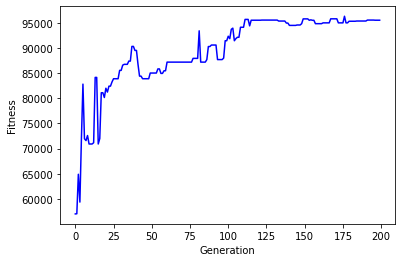

In [7]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()